# AIR QUALITY INDEX PREDICTION

We are going to do the air quality index prediction using Machine Learning . 
The Data is taken from the webpage  https://en.tutiempo.net/climate/ws-432790.html

Air Quality is now a big problem faced is many cities around the world. 
The Quality of the air is measured using the Temperature , Oxygen levels, Humidity, Rain or snow precipitation, 
Visibility and Wind speed.

### Importing the required Libraries for Data-Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Air Quality Index Dataset using pandas library

In [2]:
df = pd.read_csv("G:/AQI_data.csv")

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,2.0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,3.0,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,7.0,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.0,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,9.0,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [4]:
df.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

T - Average Temperature, TM - Minimum Temperature, Tm - Maximum Temperature, SLP - Atmospheric pressure at sea level (hPa), H - Average relative humidity (%), VV - Average visibility (Km), V - Average wind speed (Km/h), VM - Maximum sustained wind speed (Km/h), P.M 2.5 is an air pollutant that is a concern for people's health when levels in air are high.

In [5]:
AT = df[['TM','Tm']].mean(axis=1)

In [6]:
AT

0       8.60
1      10.25
2      10.05
3      12.05
4      16.65
       ...  
726    21.05
727    21.40
728    19.20
729    19.65
730    19.85
Length: 731, dtype: float64

In [7]:
df.drop('T',axis='columns',inplace=True)

In [8]:
df.insert(loc=2,column='AT',value=AT)

In [9]:
df.head(10)

,TM,Tm,AT,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,8.60,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,10.25,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,10.05,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,12.05,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,16.65,4.4,1017.3,61.0,1.3,8.7,22.2
5,16.0,25.2,20.60,10.0,1013.2,79.0,0.6,4.8,11.1
6,13.4,21.0,17.20,9.2,1015.1,87.0,0.5,1.5,7.6
7,14.3,22.6,18.45,6.6,1016.3,76.0,0.8,0.4,3.5
8,12.7,18.9,15.80,7.3,1021.2,76.0,1.8,6.1,16.5
9,11.9,18.9,15.40,6.3,1020.1,76.0,1.1,8.3,20.6


### Exploratory Data Analysis

### About the Data

In [10]:
print("The basic Info of the Air Quality Index Dataset".format(df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TM      731 non-null    float64
 1   Tm      731 non-null    float64
 2   AT      731 non-null    float64
 3   SLP     731 non-null    float64
 4   H       731 non-null    float64
 5   VV      731 non-null    float64
 6   V       731 non-null    float64
 7   VM      731 non-null    float64
 8   PM 2.5  730 non-null    float64
dtypes: float64(9)
memory usage: 51.5 KB
The basic Info of the Air Quality Index Dataset


In [11]:
print("The shape of the dataset is {} (rows and columns)".format(df.shape))

The shape of the dataset is (731, 9) (rows and columns)


In [12]:
print("The Number of Unique values present in the dataset is: ")
print(df.nunique())

The Number of Unique values present in the dataset is: 
TM        243
Tm        239
AT        441
SLP       224
H         254
VV         77
V          23
VM         94
PM 2.5     27
dtype: int64


#### Checking Null values in the dataset

In [13]:
df.isnull().sum()

TM        0
Tm        0
AT        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

From the above, output we infer that there is only one missing value in the PM 2.5 column which is the Dependent Variable

####  Find duplicate

In [14]:
df. duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
726    False
727    False
728    False
729    False
730    False
Length: 731, dtype: bool

From the data set we can be able to know that there is No dupicates

#### Drop the missing values

In [15]:
df=df.dropna()

In [16]:
df.isnull().sum()

TM        0
Tm        0
AT        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

Now we can may able to know that there is No Null Values

In [17]:
print("The shape of the dataset is {} (rows and columns)".format(df.shape))

The shape of the dataset is (730, 9) (rows and columns)


## Boxplot Analysis

In [18]:
df.columns

Index(['TM', 'Tm', 'AT', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

Boxplot Analysis


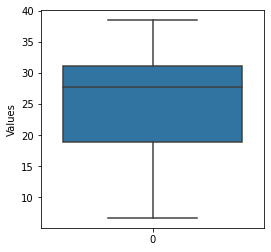

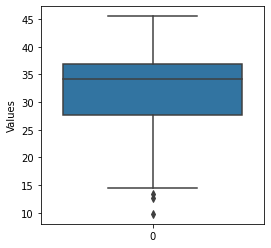

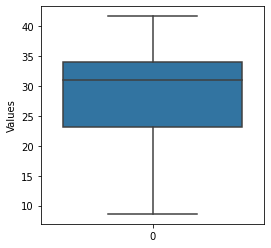

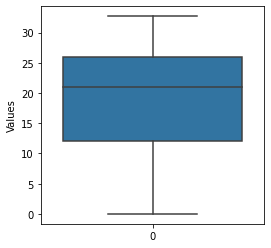

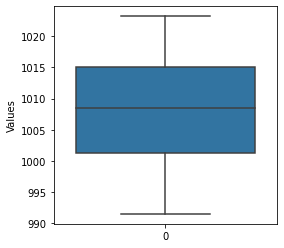

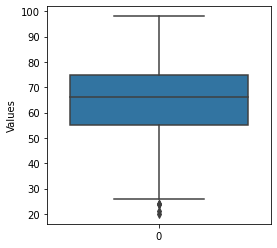

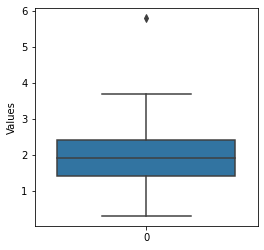

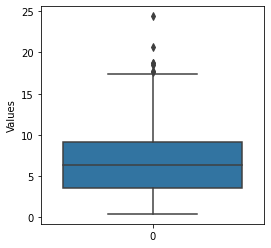

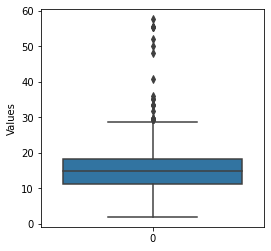

In [19]:
print('Boxplot Analysis')
for i in df.columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(data=df[i])
    plt.ylabel('Values')
    plt.show()

From the data there are few outliers Let's Remove the outlier

### Outlier Treatment

In [20]:
Q1 = df[df.columns].quantile(0.25)
Q3 = df[df.columns].quantile(0.75)
IQR = Q3 - Q1

df_out = df[((df[df.columns] < (Q1 - 1.5 * IQR)) |(df[df.columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [21]:
print("The Shape of the outlier data is {}".format(df_out.shape))

The Shape of the outlier data is (40, 9)


### Now we remove the outliers to do Machine Learning

In [22]:
df1 = df[~((df[df.columns] < (Q1 - 1.5 * IQR)) |(df[df.columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [23]:
column = list(df.columns)
df = np.where(df[column]>Q3,np.median(df[column]),np.where(df[column]<Q1,np.median(df[column]),df))

In [24]:
type(df)

numpy.ndarray

In [25]:
df2 = pd.DataFrame(df,columns=column)

In [26]:
df1.shape

(690, 9)

In [27]:
print("----------------Pre-Processed Data----------------")
df1.head()

----------------Pre-Processed Data----------------


,TM,Tm,AT,SLP,H,VV,V,VM,PM 2.5
3,8.6,15.5,12.05,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,16.65,4.4,1017.3,61.0,1.3,8.7,22.2
5,16.0,25.2,20.60,10.0,1013.2,79.0,0.6,4.8,11.1
6,13.4,21.0,17.20,9.2,1015.1,87.0,0.5,1.5,7.6
7,14.3,22.6,18.45,6.6,1016.3,76.0,0.8,0.4,3.5


## Histogram Analysis

Histogram Analysis for Pre-Processed data


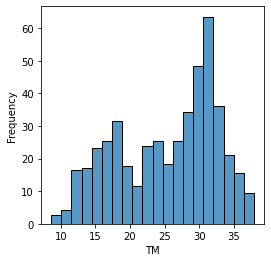

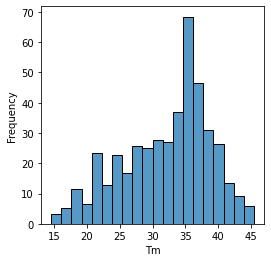

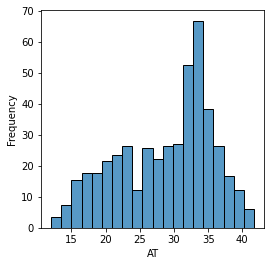

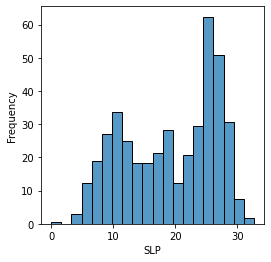

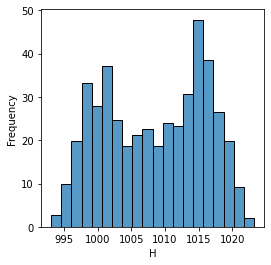

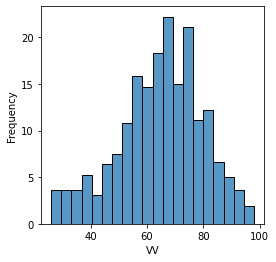

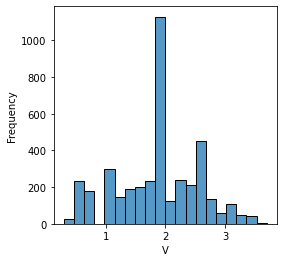

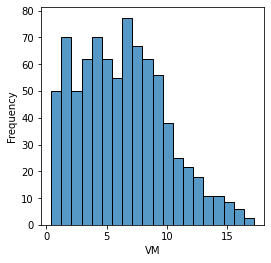

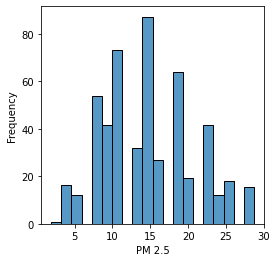

In [28]:
print('Histogram Analysis for Pre-Processed data')
for i in df1.columns:
    plt.figure(figsize=(4,4))
    sns.histplot(df1[i],bins=20,stat='frequency')
    plt.ylabel('Frequency')
    #plt.xlabel('Values')
    plt.show()

From the Histogram , we find that None of the variable is Normally distributed as the Mean & Median are not same. And it is Right or Left skewed data

## Let's try some common transformations to try and get to be Normally distributed:
 
Transforms are usually applied so that the data appear to more closely meet the assumptions of a statistical inference procedure that is to be applied, or to improve the interpretability or appearance of graphs. Nearly always, the function that is used to transform the data is invertible, and generally is continuous.
 
#### ----------------------------------------------------1. Logarithmic Transformation ------------------------------------------------------------
#### ----------------------------------------------------2. Reciprocal Transformation -------------------------------------------------------------
#### ----------------------------------------------------3. Square Root Transformation -----------------------------------------------------------
#### ----------------------------------------------------4. Exponential Transformation  -----------------------------------------------------------
#### ----------------------------------------------------5. Boxcox Transformation ------------------------------------------------------------------

In [29]:
df1.columns

Index(['TM', 'Tm', 'AT', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [30]:
from scipy.stats import skew

In [31]:
import scipy.stats as stats
def diagnostic_plots(df1, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df1[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df1[variable], dist="norm", plot=plt)

    plt.show()

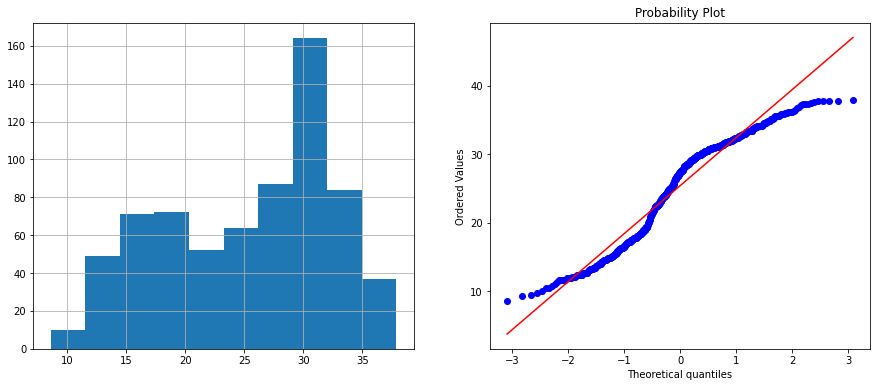

-0.3913
---------------------------------------------------------------------------------------------------------------
----------------------------After Applying Logarithmic Transformation[Log_TM]----------------------------------
---------------------------------------------------------------------------------------------------------------


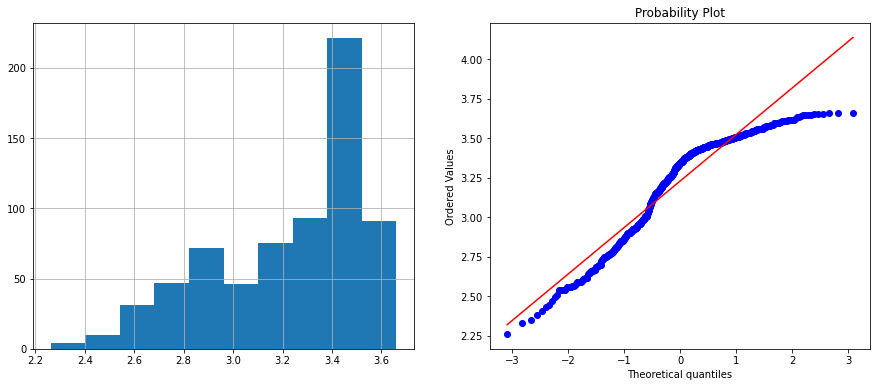

-0.7902


In [32]:
diagnostic_plots(df1,'TM')
print(np.round(skew(df1['TM']),4))
##Log Transformation
print("---------------------------------------------------------------------------------------------------------------")
print("----------------------------After Applying Logarithmic Transformation[Log_TM]----------------------------------")
print("---------------------------------------------------------------------------------------------------------------")
df1['Log_TM']=np.log(df1['TM']+1)
diagnostic_plots(df1,'Log_TM')
print(np.round(skew(df1['Log_TM']),4))

#### Reciprocal Transformation For TM[Minimum Temperature]

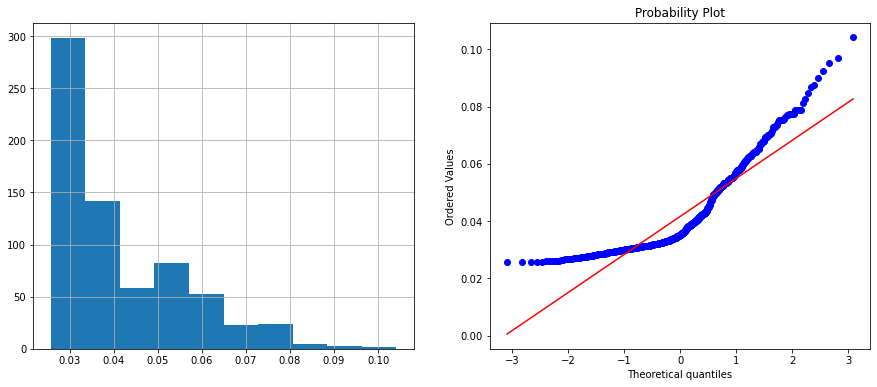

1.3055

In [33]:
df1['Rec_TM']=1/(df1['TM']+1)
diagnostic_plots(df1,'Rec_TM')
np.round(skew(df1["Rec_TM"]),4)

#### Square Root Transformation For TM[Minimum Temperature]

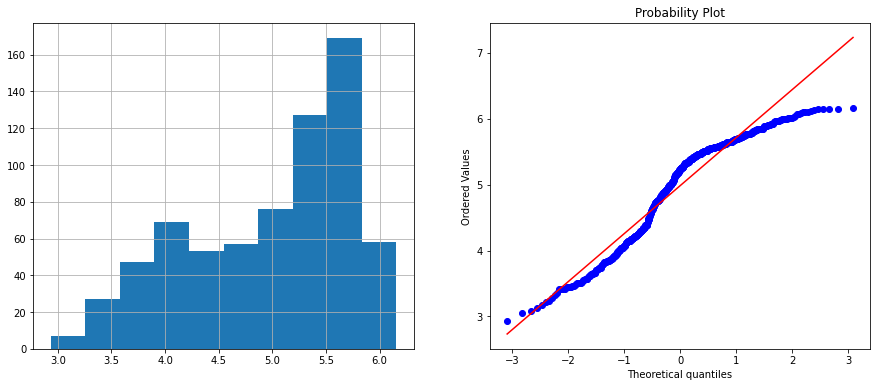

-0.5905

In [34]:
df1['sqr_TM']=df1['TM']**(1/2)
diagnostic_plots(df1,'sqr_TM')
np.round(skew(df1["sqr_TM"]),4)

#### Exponential Transformation For TM[Minimum Temperature]

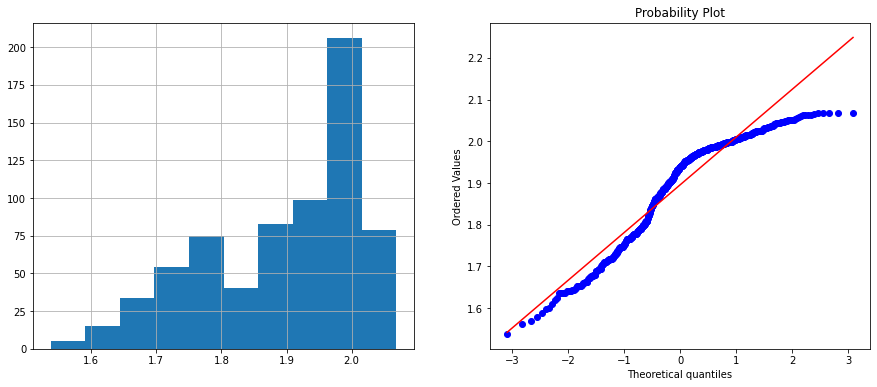

-0.7206

In [35]:
df1['Exp_TM']=df1['TM']**(1/5)
diagnostic_plots(df1,'Exp_TM')
np.round(skew(df1["Exp_TM"]),4)

#### Boxcox Transformation For TM[Minimum Temperature]

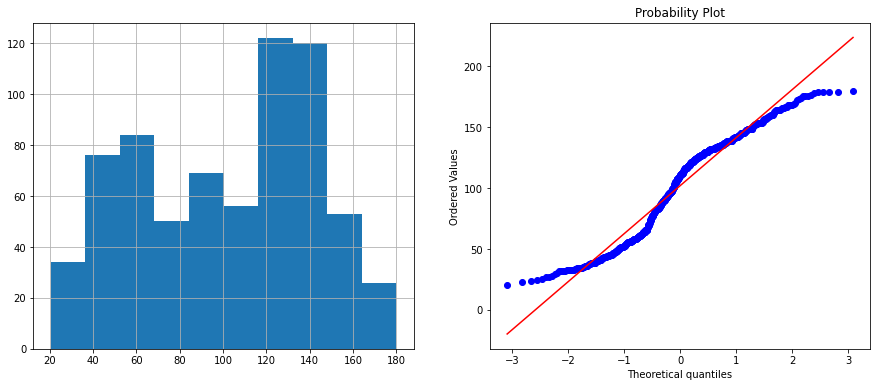

-0.2021

In [36]:
df1['TM_Boxcox'],parameters=stats.boxcox(df1['TM']+1) 
diagnostic_plots(df1,'TM_Boxcox')
np.round(skew(df1["TM_Boxcox"]),4)

In [37]:
log1=print(np.round(skew(df1["Log_TM"]),4))
rec1=print(np.round(skew(df1["Rec_TM"]),4))
sqr1=print(np.round(skew(df1["sqr_TM"]),4))
Exp1=print(np.round(skew(df1["Exp_TM"]),4))
Boxcox1=print(np.round(skew(df1["TM_Boxcox"]),4))

-0.7902
1.3055
-0.5905
-0.7206
-0.2021


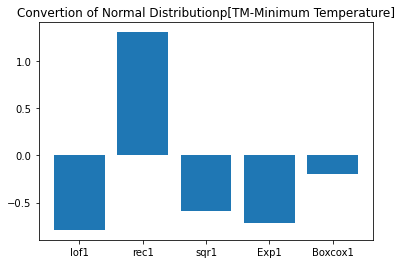

In [38]:
x = np.array(['lof1','rec1','sqr1','Exp1','Boxcox1'])
y = np.array([-0.7902,1.3055,-0.5905,-0.7206,-0.2021])
plt.title("Convertion of Normal Distributionp[TM-Minimum Temperature]")
plt.bar(x,y)
plt.show()

#### Transformation for Tm [Maximum Temperature]

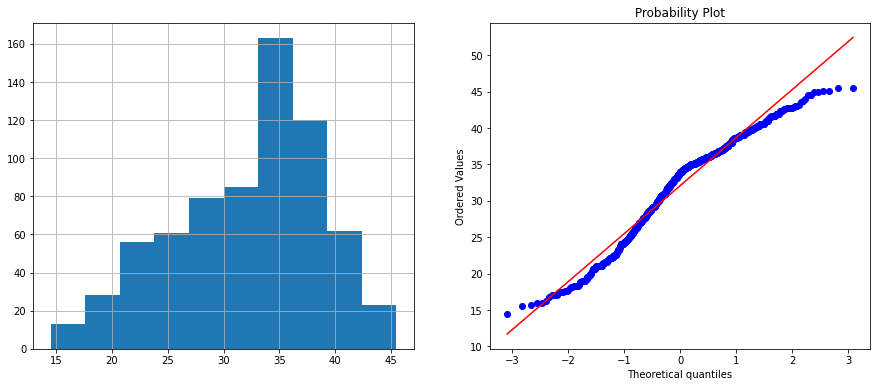

-0.4785
---------------------------------------------------------------------------------------------------------------
----------------------------After Applying Logarithmic Transformation[Log_Tm]----------------------------------
---------------------------------------------------------------------------------------------------------------


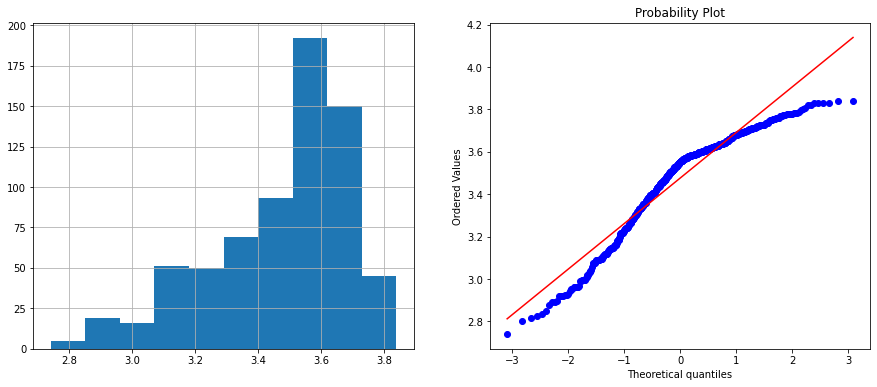

-0.8956


In [39]:
diagnostic_plots(df1,'Tm')
print(np.round(skew(df1['Tm']),4))
##Log Transformation
print("---------------------------------------------------------------------------------------------------------------")
print("----------------------------After Applying Logarithmic Transformation[Log_Tm]----------------------------------")
print("---------------------------------------------------------------------------------------------------------------")
df1['Log_Tm']=np.log(df1['Tm']+1)
diagnostic_plots(df1,'Log_Tm')
print(np.round(skew(df1['Log_Tm']),4))

### Reciprocal Transformation For Tm[Maximum Temperature]

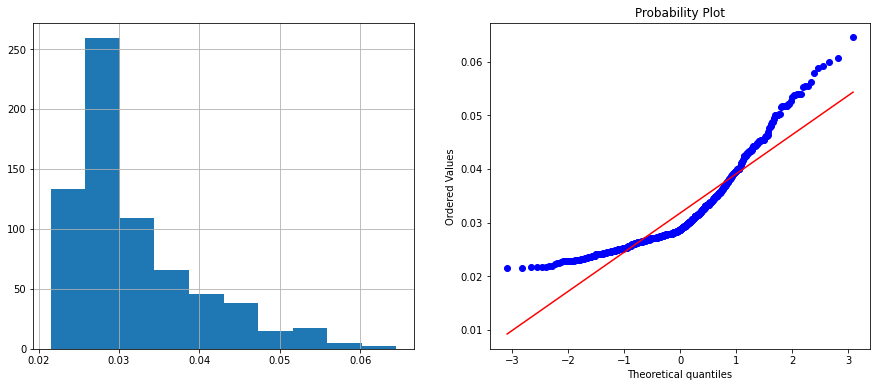

1.3678

In [40]:
df1['Rec_Tm']=1/(df1['Tm']+1)
diagnostic_plots(df1,'Rec_Tm')
np.round(skew(df1["Rec_Tm"]),4)

### Square Root Transformation For Tm[Maximum Temperature]

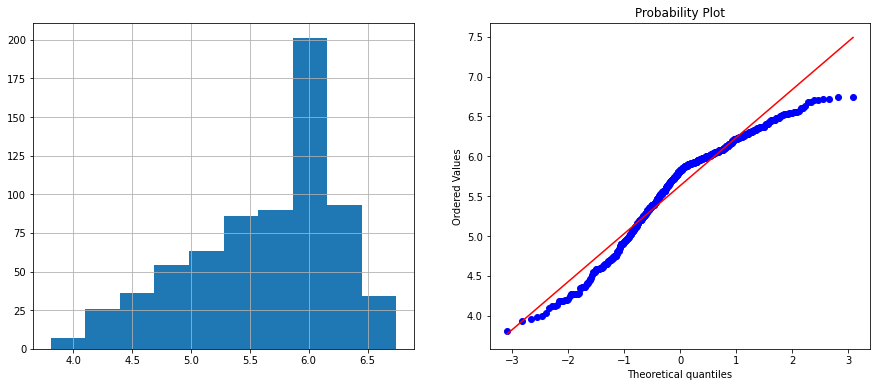

-0.6892

In [41]:
df1['sqr_Tm']=df1['Tm']**(1/2)
diagnostic_plots(df1,'sqr_Tm')
np.round(skew(df1["sqr_Tm"]),4)

### Exponential Transformation For Tm[Maximum Temperature]

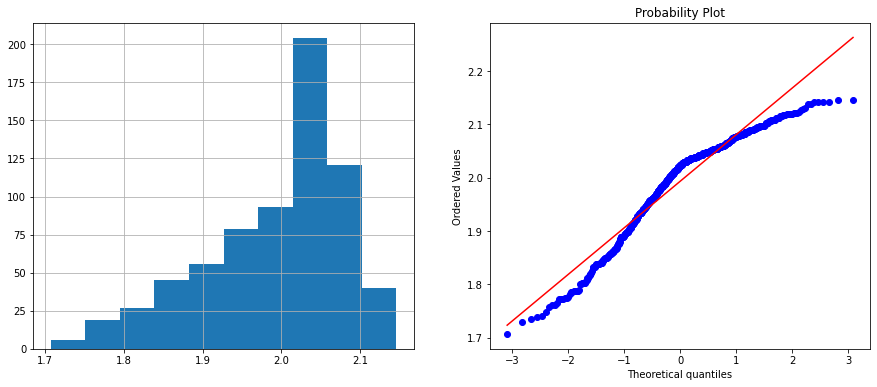

-0.8212

In [42]:
df1['Exp_Tm']=df1['Tm']**(1/5)
diagnostic_plots(df1,'Exp_Tm')
np.round(skew(df1["Exp_Tm"]),4)

### Boxcox Transformation For Tm[Maximum Temperature]

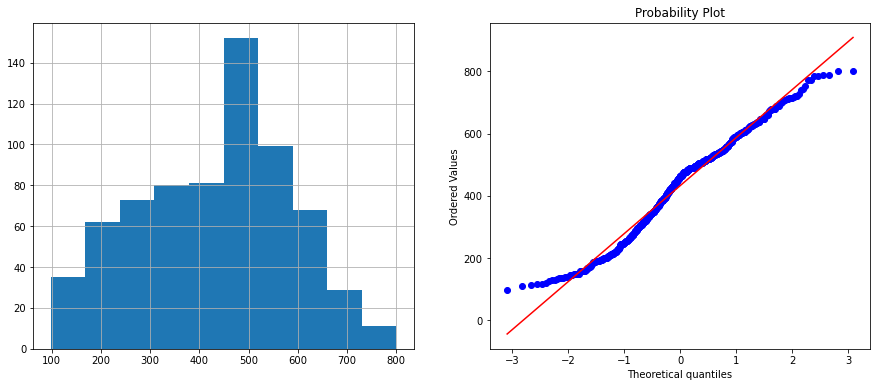

-0.1271

In [43]:
df1['Tm_Boxcox'],parameters=stats.boxcox(df1['Tm']+1) 
diagnostic_plots(df1,'Tm_Boxcox')
np.round(skew(df1["Tm_Boxcox"]),4)

In [44]:
log2=print(np.round(skew(df1["Log_Tm"]),4))
rec2=print(np.round(skew(df1["Rec_Tm"]),4))
sqr2=print(np.round(skew(df1["sqr_Tm"]),4))
Exp2=print(np.round(skew(df1["Exp_Tm"]),4))
Boxcox2=print(np.round(skew(df1["Tm_Boxcox"]),4))

-0.8956
1.3678
-0.6892
-0.8212
-0.1271


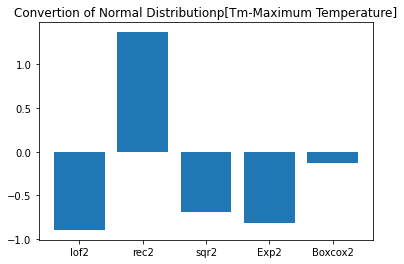

In [45]:
x = np.array(['lof2','rec2','sqr2','Exp2','Boxcox2'])
y = np.array([-0.8956,1.3678,-0.6892,-0.8212,-0.1271])
plt.title("Convertion of Normal Distributionp[Tm-Maximum Temperature]")
plt.bar(x,y)
plt.show()

### Transformation for AT [Average Temperature]

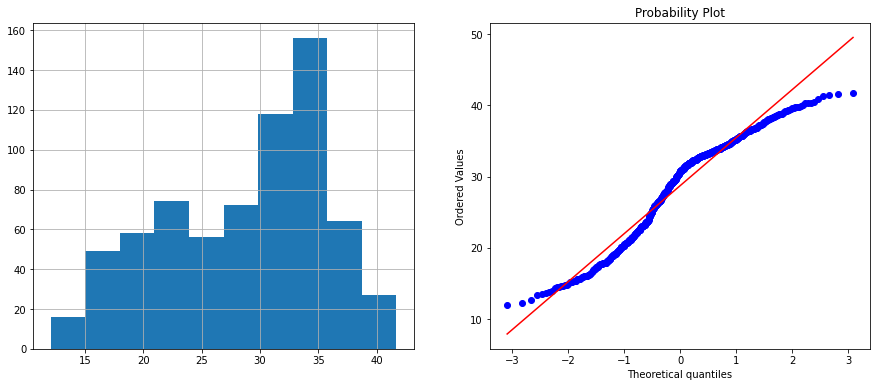

-0.4442
---------------------------------------------------------------------------------------------------------------
----------------------------After Applying Logarithmic Transformation[Log_AT]----------------------------------
---------------------------------------------------------------------------------------------------------------


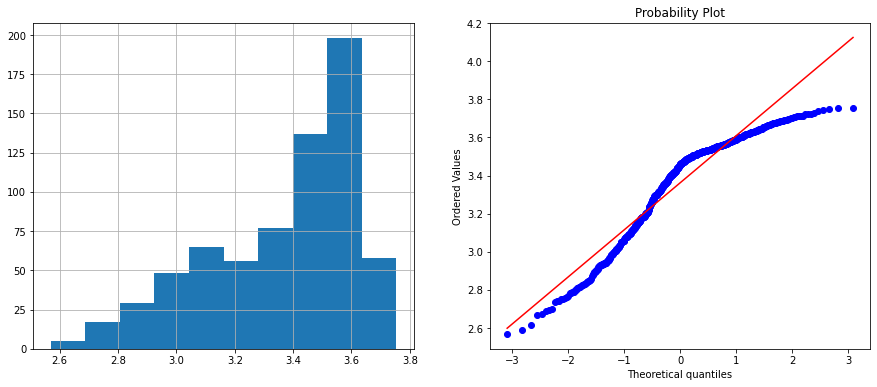

-0.8308


In [46]:
diagnostic_plots(df1,'AT')
print(np.round(skew(df1['AT']),4))
##Log Transformation
print("---------------------------------------------------------------------------------------------------------------")
print("----------------------------After Applying Logarithmic Transformation[Log_AT]----------------------------------")
print("---------------------------------------------------------------------------------------------------------------")
df1['Log_AT']=np.log(df1['AT']+1)
diagnostic_plots(df1,'Log_AT')
print(np.round(skew(df1['Log_AT']),4))

### Reciprocal Transformation For AT[Average Temperature]

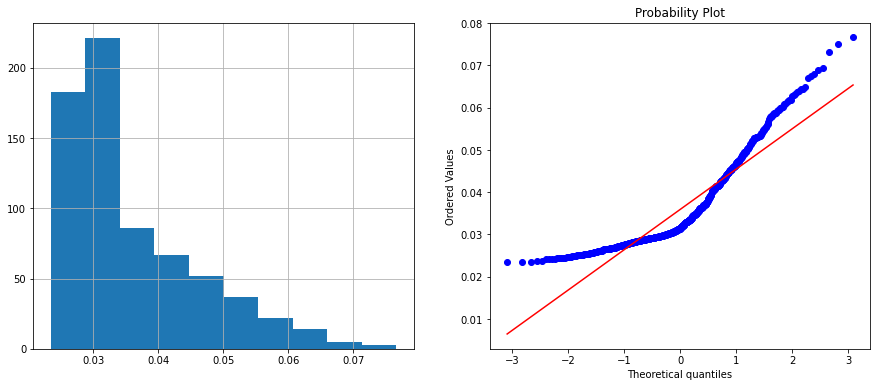

1.2861

In [47]:
df1['Rec_AT']=1/(df1['AT']+1)
diagnostic_plots(df1,'Rec_AT')
np.round(skew(df1["Rec_AT"]),4)

### Square Root Transformation For AT[Average Temperature]

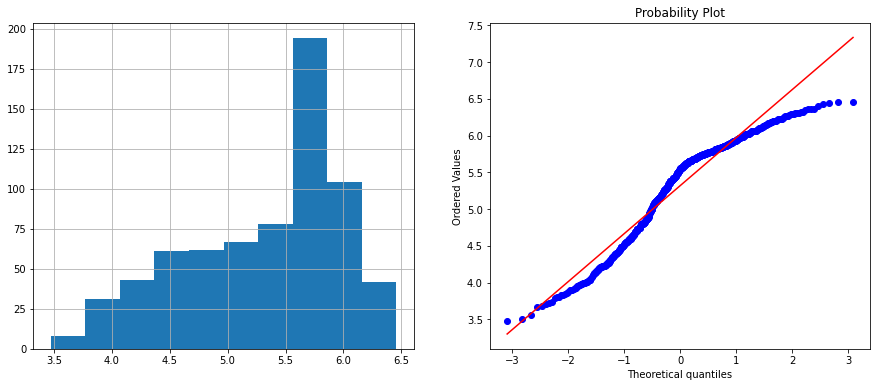

-0.6392

In [48]:
df1['sqr_AT']=df1['AT']**(1/2)
diagnostic_plots(df1,'sqr_AT')
np.round(skew(df1["sqr_AT"]),4)

### Exponential Transformation For AT[Average Temperature]

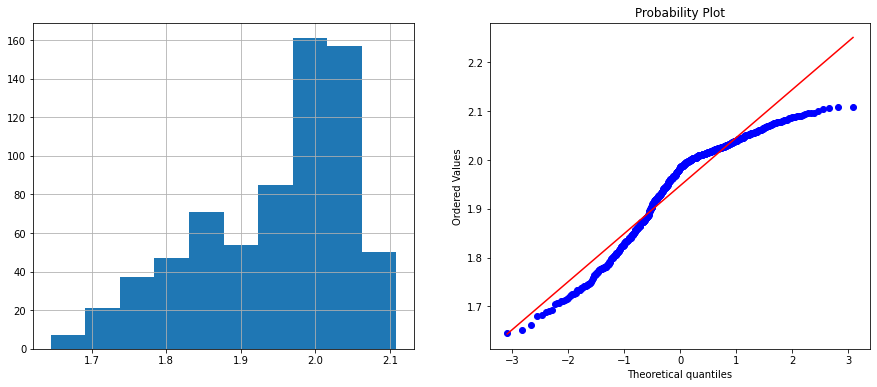

-0.7627

In [49]:
df1['Exp_AT']=df1['AT']**(1/5)
diagnostic_plots(df1,'Exp_AT')
np.round(skew(df1["Exp_AT"]),4)

### Boxcox Transformation For AT[Average Temperature]

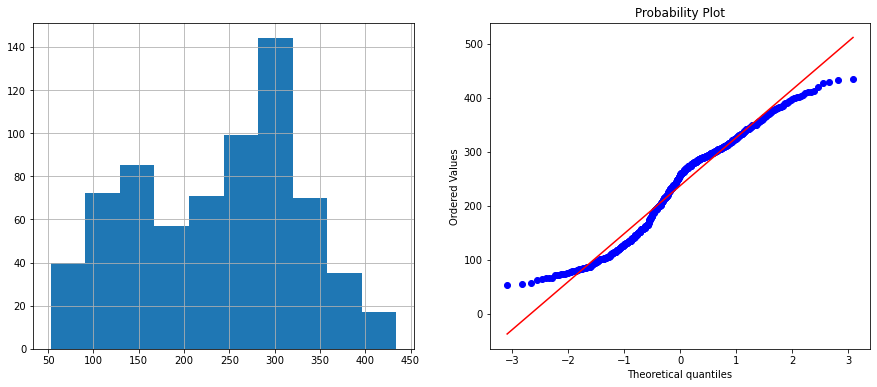

-0.1719

In [50]:
df1['AT_Boxcox'],parameters=stats.boxcox(df1['AT']+1) 
diagnostic_plots(df1,'AT_Boxcox')
np.round(skew(df1["AT_Boxcox"]),4)

In [51]:
log3=print(np.round(skew(df1["Log_AT"]),4))
rec3=print(np.round(skew(df1["Rec_AT"]),4))
sqr3=print(np.round(skew(df1["sqr_AT"]),4))
Exp3=print(np.round(skew(df1["Exp_AT"]),4))
Boxcox3=print(np.round(skew(df1["AT_Boxcox"]),4))

-0.8308
1.2861
-0.6392
-0.7627
-0.1719


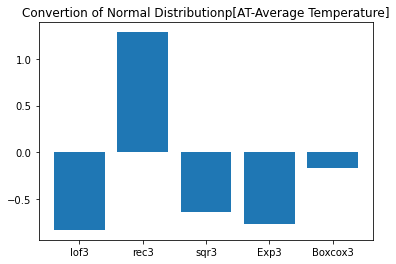

In [52]:
x = np.array(['lof3','rec3','sqr3','Exp3','Boxcox3'])
y = np.array([-0.8308,1.2861,-0.6392,-0.7627,-0.1719])
plt.title("Convertion of Normal Distributionp[AT-Average Temperature]")
plt.bar(x,y)
plt.show()

### Transformation for SLP [Atmospheric pressure at sea level (hPa)]

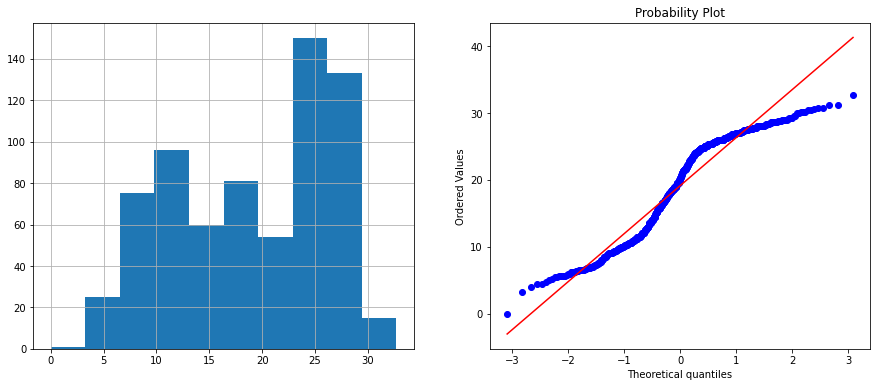

-0.3103
---------------------------------------------------------------------------------------------------------------
----------------------------After Applying Logarithmic Transformation[Log_SLP]----------------------------------
---------------------------------------------------------------------------------------------------------------


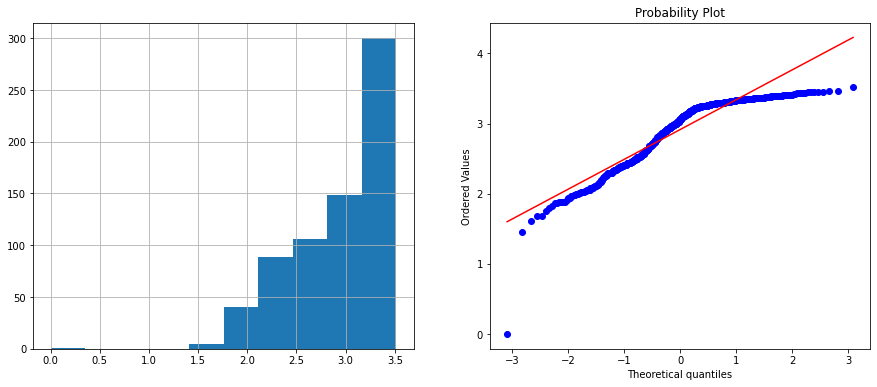

-1.091


In [53]:
diagnostic_plots(df1,'SLP')
print(np.round(skew(df1['SLP']),4))
##Log Transformation
print("---------------------------------------------------------------------------------------------------------------")
print("----------------------------After Applying Logarithmic Transformation[Log_SLP]----------------------------------")
print("---------------------------------------------------------------------------------------------------------------")
df1['Log_SLP']=np.log(df1['SLP']+1)
diagnostic_plots(df1,'Log_SLP')
print(np.round(skew(df1['Log_SLP']),4))

### Reciprocal Transformation For SLP [Atmospheric pressure at sea level (hPa)]

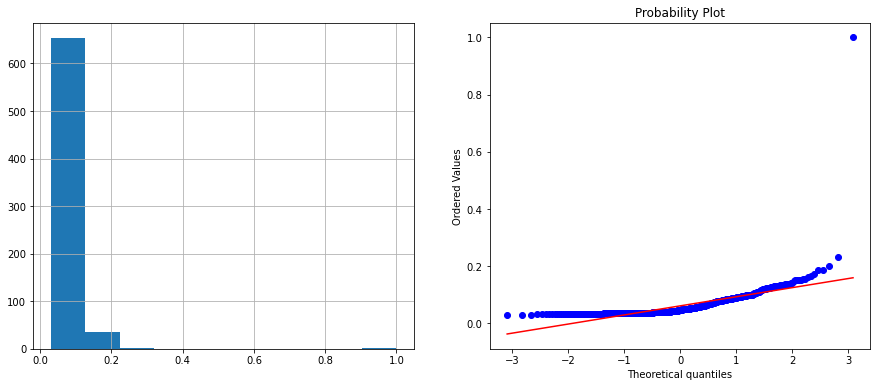

11.7375

In [54]:
df1['Rec_SLP']=1/(df1['SLP']+1)
diagnostic_plots(df1,'Rec_SLP')
np.round(skew(df1["Rec_SLP"]),4)

### Square Root Transformation For SLP [Atmospheric pressure at sea level (hPa)]

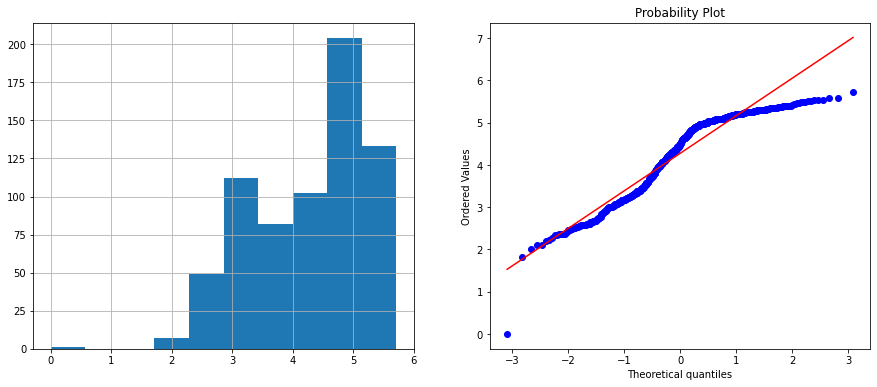

-0.6391

In [55]:
df1['sqr_SLP']=df1['SLP']**(1/2)
diagnostic_plots(df1,'sqr_SLP')
np.round(skew(df1["sqr_SLP"]),4)

### Exponential Transformation For SLP [Atmospheric pressure at sea level (hPa)]

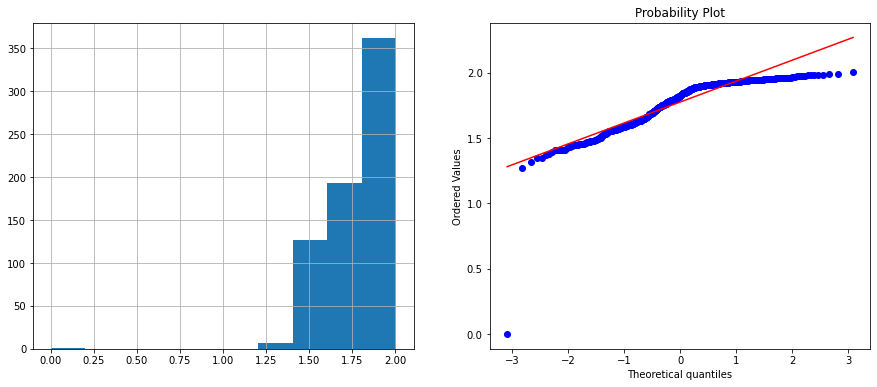

-2.0559

In [56]:
df1['Exp_SLP']=df1['SLP']**(1/5)
diagnostic_plots(df1,'Exp_SLP')
np.round(skew(df1["Exp_SLP"]),4)

### Boxcox Transformation For SLP [Atmospheric pressure at sea level (hPa)]

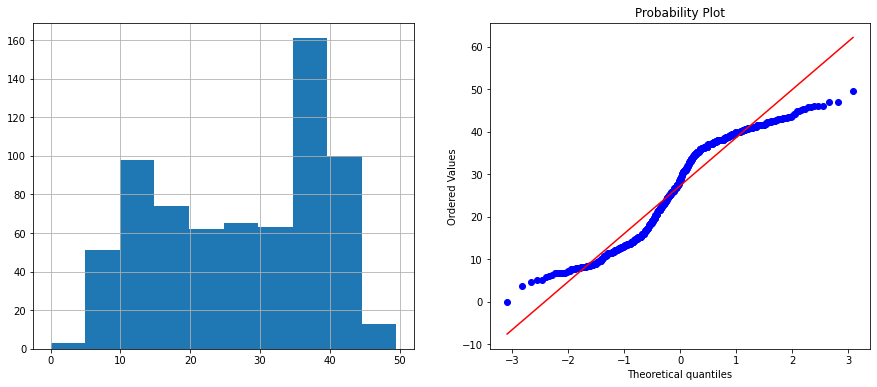

-0.2457

In [57]:
df1['SLP_Boxcox'],parameters=stats.boxcox(df1['SLP']+1) 
diagnostic_plots(df1,'SLP_Boxcox')
np.round(skew(df1["SLP_Boxcox"]),4)

In [58]:
log4=print(np.round(skew(df1["Log_SLP"]),4))
rec4=print(np.round(skew(df1["Rec_SLP"]),4))
sqr4=print(np.round(skew(df1["sqr_SLP"]),4))
Exp4=print(np.round(skew(df1["Exp_SLP"]),4))
Boxcox4=print(np.round(skew(df1["SLP_Boxcox"]),4))

-1.091
11.7375
-0.6391
-2.0559
-0.2457


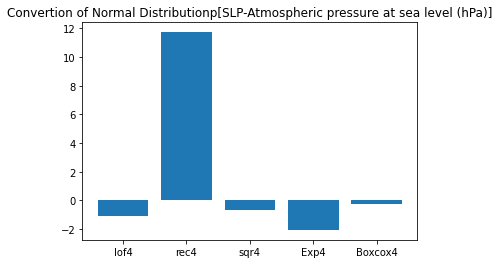

In [59]:
x = np.array(['lof4','rec4','sqr4','Exp4','Boxcox4'])
y = np.array([-1.091,11.7375,-0.6391,-2.0559,-0.2457])
plt.title("Convertion of Normal Distributionp[SLP-Atmospheric pressure at sea level (hPa)]")
plt.bar(x,y)
plt.show()

### Transformation for H [Average relative humidity (%)]

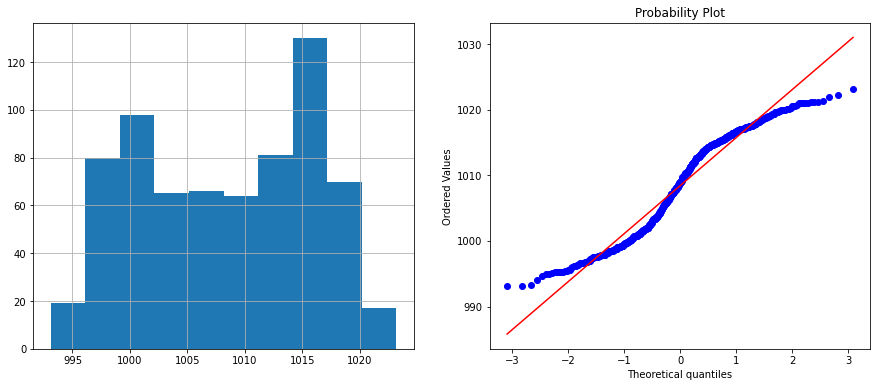

-0.1096
---------------------------------------------------------------------------------------------------------------
----------------------------After Applying Logarithmic Transformation[Log_H]----------------------------------
---------------------------------------------------------------------------------------------------------------


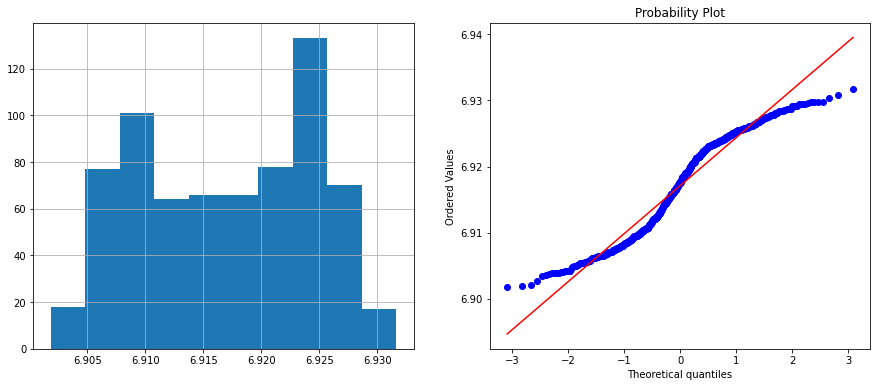

-0.1175


In [60]:
diagnostic_plots(df1,'H')
print(np.round(skew(df1['H']),4))
##Log Transformation
print("---------------------------------------------------------------------------------------------------------------")
print("----------------------------After Applying Logarithmic Transformation[Log_H]----------------------------------")
print("---------------------------------------------------------------------------------------------------------------")
df1['Log_H']=np.log(df1['H']+1)
diagnostic_plots(df1,'Log_H')
print(np.round(skew(df1['Log_H']),4))

### Reciprocal Transformation For H[Average relative humidity (%)]

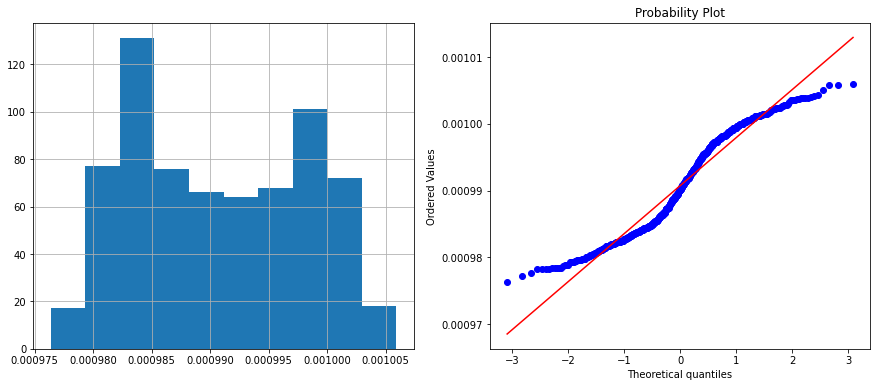

0.1254

In [61]:
df1['Rec_H']=1/(df1['H']+1)
diagnostic_plots(df1,'Rec_H')
np.round(skew(df1["Rec_H"]),4)

### Square Root Transformation For H[Average relative humidity (%)]

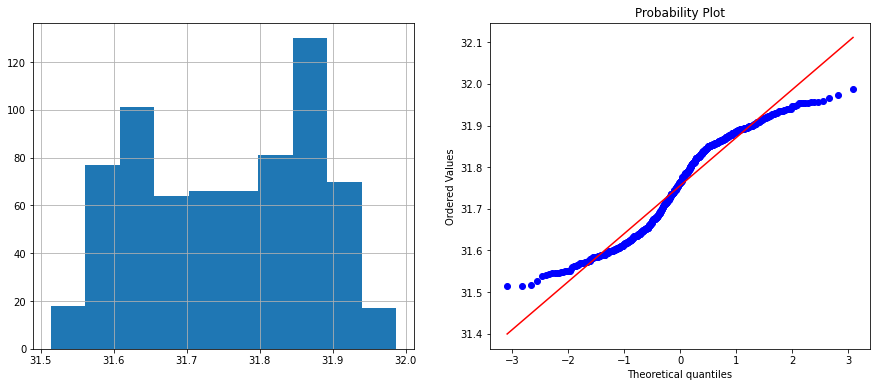

-0.1135

In [62]:
df1['sqr_H']=df1['H']**(1/2)
diagnostic_plots(df1,'sqr_H')
np.round(skew(df1["sqr_H"]),4)

### Exponential Transformation For H[Average relative humidity (%)]

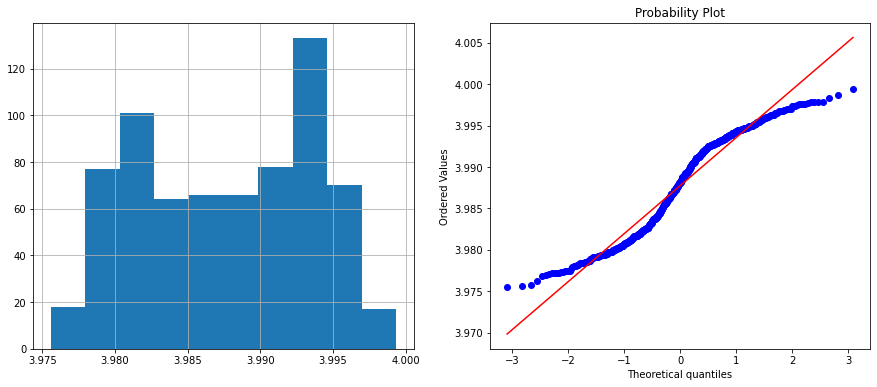

-0.1159

In [63]:
df1['Exp_H']=df1['H']**(1/5)
diagnostic_plots(df1,'Exp_H')
np.round(skew(df1["Exp_H"]),4)

### Boxcox Transformation For H[Average relative humidity (%)]

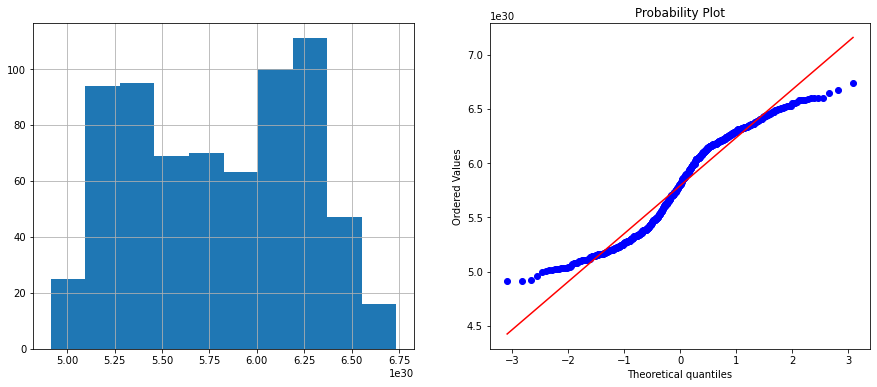

-0.0337

In [64]:
df1['H_Boxcox'],parameters=stats.boxcox(df1['H']+1) 
diagnostic_plots(df1,'H_Boxcox')
np.round(skew(df1["H_Boxcox"]),4)

In [65]:
log5=print(np.round(skew(df1["Log_H"]),4))
rec5=print(np.round(skew(df1["Rec_H"]),4))
sqr5=print(np.round(skew(df1["sqr_H"]),4))
Exp5=print(np.round(skew(df1["Exp_H"]),4))
Boxcox5=print(np.round(skew(df1["H_Boxcox"]),4))

-0.1175
0.1254
-0.1135
-0.1159
-0.0337


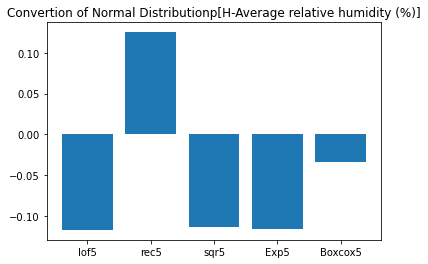

In [66]:
x = np.array(['lof5','rec5','sqr5','Exp5','Boxcox5'])
y = np.array([-0.1175,0.1254,-0.1135,-0.1159,-0.0337])
plt.title("Convertion of Normal Distributionp[H-Average relative humidity (%)]")
plt.bar(x,y)
plt.show()

### Transformation for VV [Average visibility (Km)]

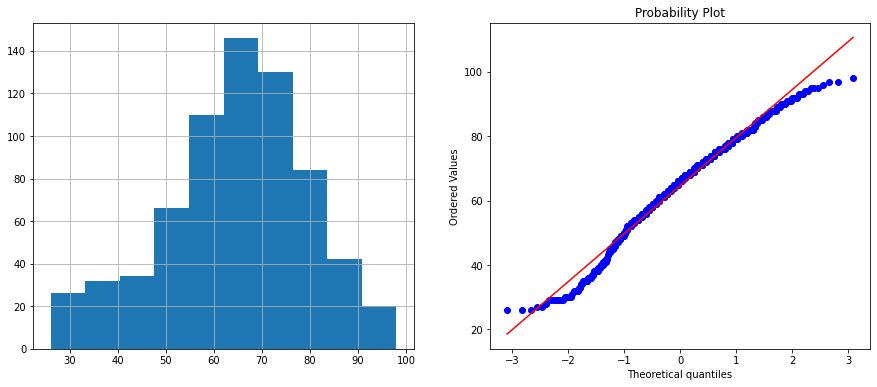

-0.4015
---------------------------------------------------------------------------------------------------------------
----------------------------After Applying Logarithmic Transformation[Log_VV]----------------------------------
---------------------------------------------------------------------------------------------------------------


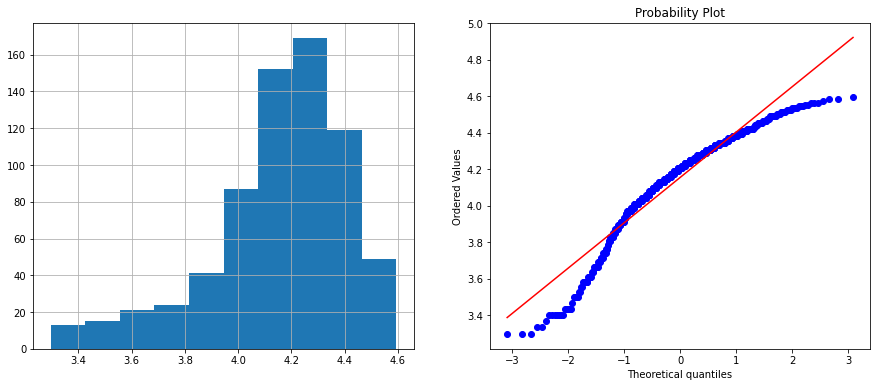

-1.0784


In [67]:
diagnostic_plots(df1,'VV')
print(np.round(skew(df1['VV']),4))
##Log Transformation
print("---------------------------------------------------------------------------------------------------------------")
print("----------------------------After Applying Logarithmic Transformation[Log_VV]----------------------------------")
print("---------------------------------------------------------------------------------------------------------------")
df1['Log_VV']=np.log(df1['VV']+1)
diagnostic_plots(df1,'Log_VV')
print(np.round(skew(df1['Log_VV']),4))

### Reciprocal Transformation For VV [Average visibility (Km)]

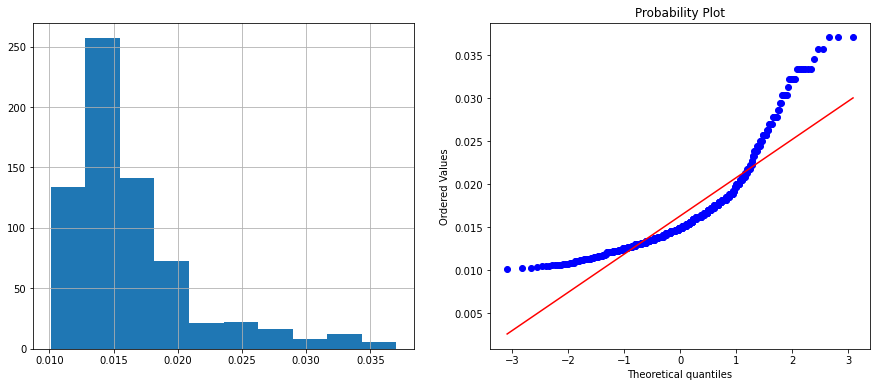

1.8494

In [68]:
df1['Rec_VV']=1/(df1['VV']+1)
diagnostic_plots(df1,'Rec_VV')
np.round(skew(df1["Rec_VV"]),4)

### Square Root Transformation For VV [Average visibility (Km)]

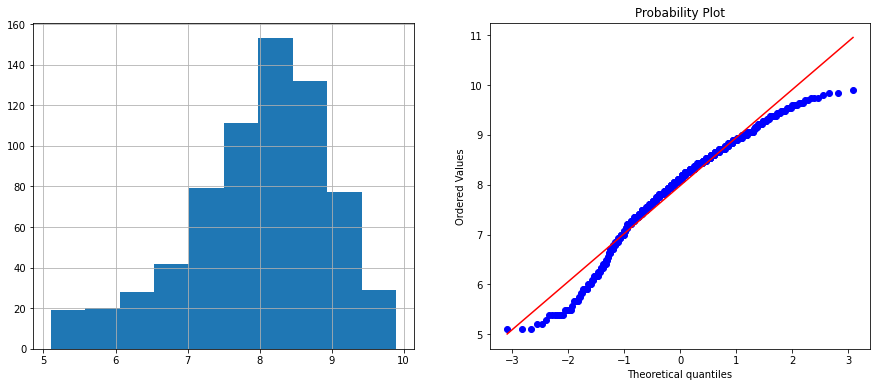

-0.7335

In [69]:
df1['sqr_VV']=df1['VV']**(1/2)
diagnostic_plots(df1,'sqr_VV')
np.round(skew(df1["sqr_VV"]),4)

### Exponential Transformation For VV [Average visibility (Km)]

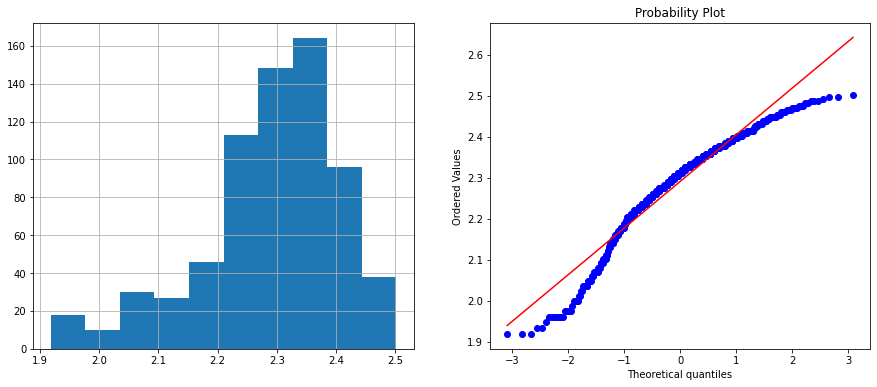

-0.9457

In [70]:
df1['Exp_VV']=df1['VV']**(1/5)
diagnostic_plots(df1,'Exp_VV')
np.round(skew(df1["Exp_VV"]),4)

### Boxcox Transformation For VV [Average visibility (Km)]

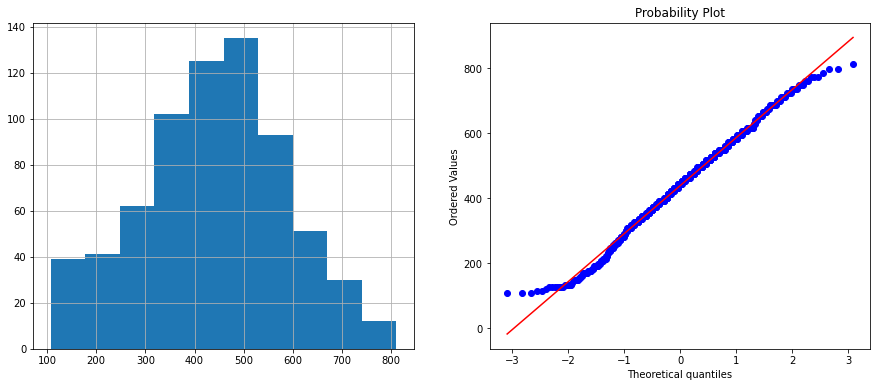

-0.0691

In [71]:
df1['VV_Boxcox'],parameters=stats.boxcox(df1['VV']+1) 
diagnostic_plots(df1,'VV_Boxcox')
np.round(skew(df1["VV_Boxcox"]),4)

In [72]:
log6=print(np.round(skew(df1["Log_VV"]),4))
rec6=print(np.round(skew(df1["Rec_VV"]),4))
sqr6=print(np.round(skew(df1["sqr_VV"]),4))
Exp6=print(np.round(skew(df1["Exp_VV"]),4))
Boxcox6=print(np.round(skew(df1["VV_Boxcox"]),4))

-1.0784
1.8494
-0.7335
-0.9457
-0.0691


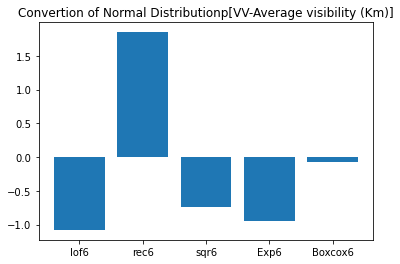

In [73]:
x = np.array(['lof6','rec6','sqr6','Exp6','Boxcox6'])
y = np.array([-1.0784,1.8494,-0.7335,-0.9457,-0.0691])
plt.title("Convertion of Normal Distributionp[VV-Average visibility (Km)]")
plt.bar(x,y)
plt.show()

### Transformation for V [Average wind speed (Km/h)]

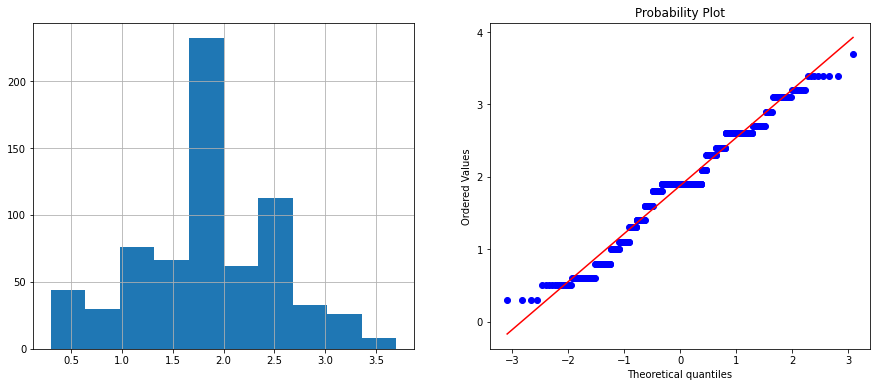

-0.1815
---------------------------------------------------------------------------------------------------------------
----------------------------After Applying Logarithmic Transformation[Log_V]----------------------------------
---------------------------------------------------------------------------------------------------------------


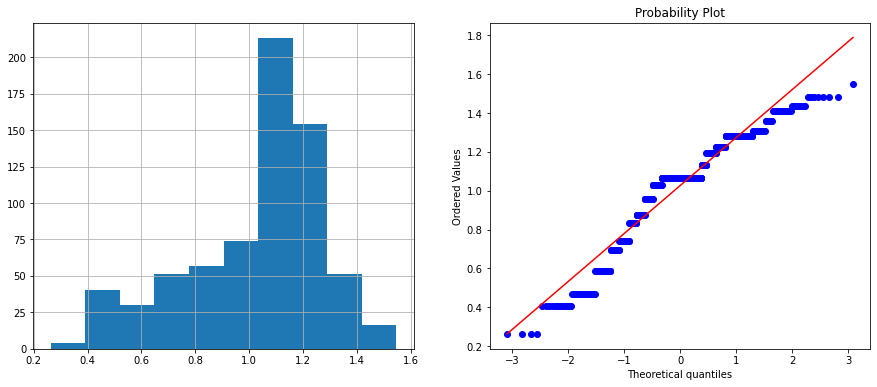

-0.7762


In [74]:
diagnostic_plots(df1,'V')
print(np.round(skew(df1['V']),4))
##Log Transformation
print("---------------------------------------------------------------------------------------------------------------")
print("----------------------------After Applying Logarithmic Transformation[Log_V]----------------------------------")
print("---------------------------------------------------------------------------------------------------------------")
df1['Log_V']=np.log(df1['V']+1)
diagnostic_plots(df1,'Log_V')
print(np.round(skew(df1['Log_V']),4))

### Reciprocal Transformation For V [Average wind speed (Km/h)]

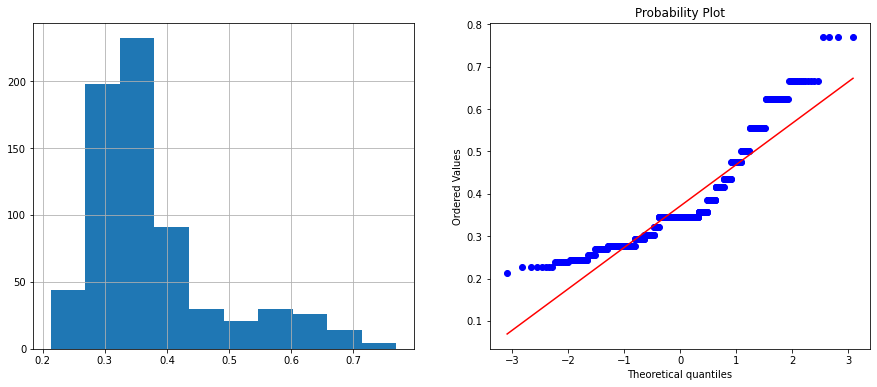

1.3731

In [75]:
df1['Rec_V']=1/(df1['V']+1)
diagnostic_plots(df1,'Rec_V')
np.round(skew(df1["Rec_V"]),4)

### Square Root Transformation For V [Average wind speed (Km/h)]

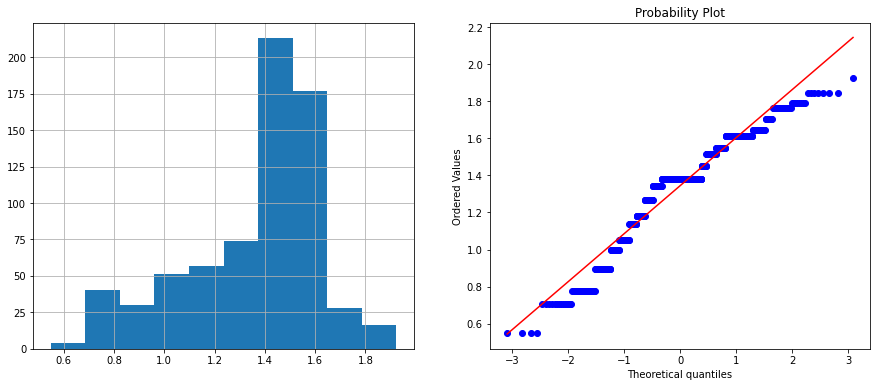

-0.6914

In [76]:
df1['sqr_V']=df1['V']**(1/2)
diagnostic_plots(df1,'sqr_V')
np.round(skew(df1["sqr_V"]),4)

### Exponential Transformation For V [Average wind speed (Km/h)]

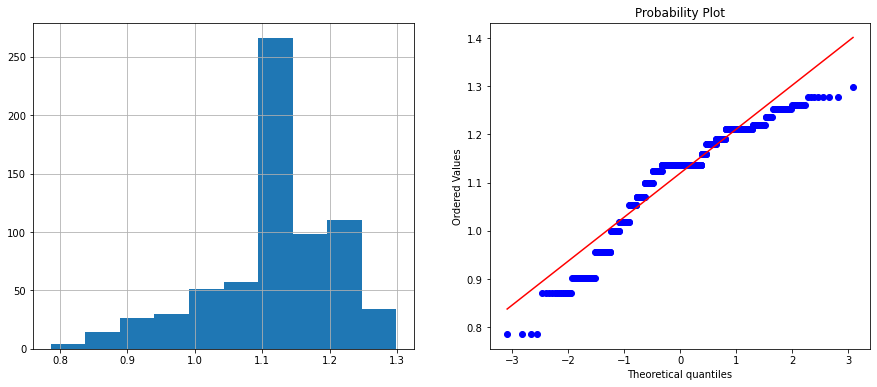

-1.0276

In [77]:
df1['Exp_V']=df1['V']**(1/5)
diagnostic_plots(df1,'Exp_V')
np.round(skew(df1["Exp_V"]),4)

### Boxcox Transformation For V [Average wind speed (Km/h)]

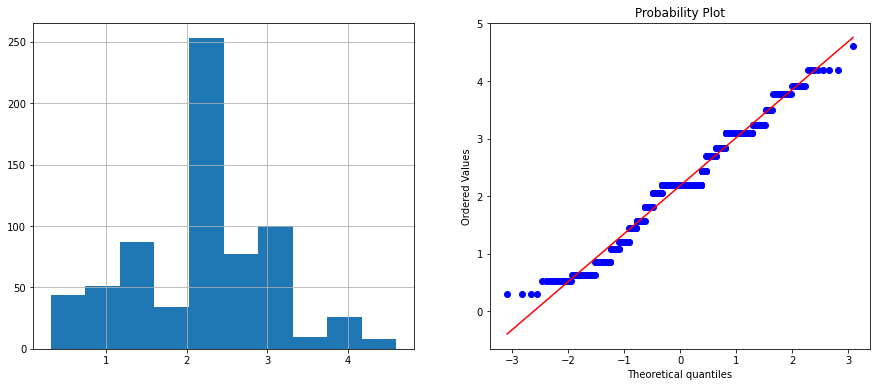

-0.0506

In [78]:
df1['V_Boxcox'],parameters=stats.boxcox(df1['V']+1) 
diagnostic_plots(df1,'V_Boxcox')
np.round(skew(df1["V_Boxcox"]),4)

In [79]:
log7=print(np.round(skew(df1["Log_V"]),4))
rec7=print(np.round(skew(df1["Rec_V"]),4))
sqr7=print(np.round(skew(df1["sqr_V"]),4))
Exp7=print(np.round(skew(df1["Exp_V"]),4))
Boxcox7=print(np.round(skew(df1["V_Boxcox"]),4))

-0.7762
1.3731
-0.6914
-1.0276
-0.0506


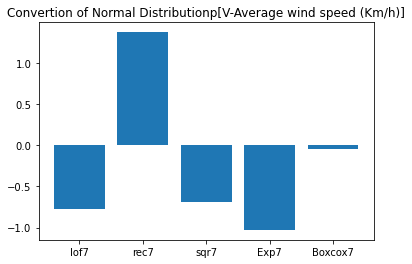

In [80]:
x = np.array(['lof7','rec7','sqr7','Exp7','Boxcox7'])
y = np.array([-0.7762,1.3731,-0.6914,-1.0276,-0.0506])
plt.title("Convertion of Normal Distributionp[V-Average wind speed (Km/h)]")
plt.bar(x,y)
plt.show()

### Transformation for VM [Maximum sustained wind speed (Km/h)]

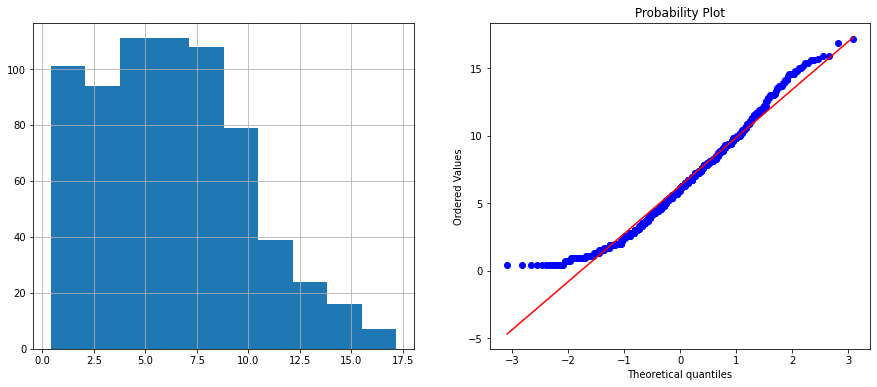

0.4788
---------------------------------------------------------------------------------------------------------------
----------------------------After Applying Logarithmic Transformation[Log_VM]----------------------------------
---------------------------------------------------------------------------------------------------------------


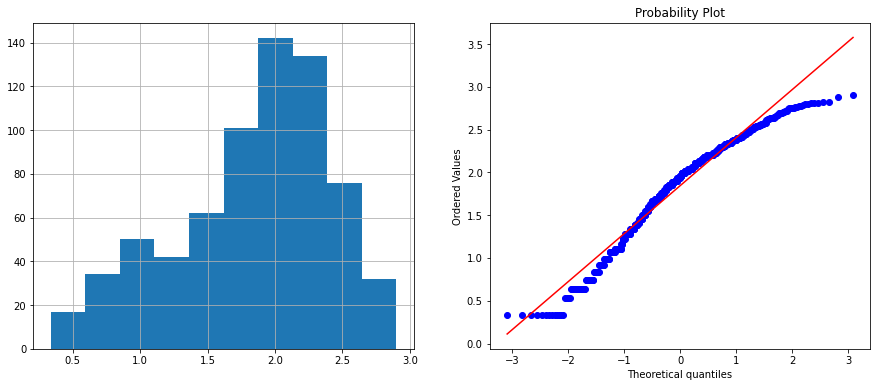

-0.6399


In [81]:
diagnostic_plots(df1,'VM')
print(np.round(skew(df1['VM']),4))
##Log Transformation
print("---------------------------------------------------------------------------------------------------------------")
print("----------------------------After Applying Logarithmic Transformation[Log_VM]----------------------------------")
print("---------------------------------------------------------------------------------------------------------------")
df1['Log_VM']=np.log(df1['VM']+1)
diagnostic_plots(df1,'Log_VM')
print(np.round(skew(df1['Log_VM']),4))

### Reciprocal Transformation For VM [Maximum sustained wind speed (Km/h)]

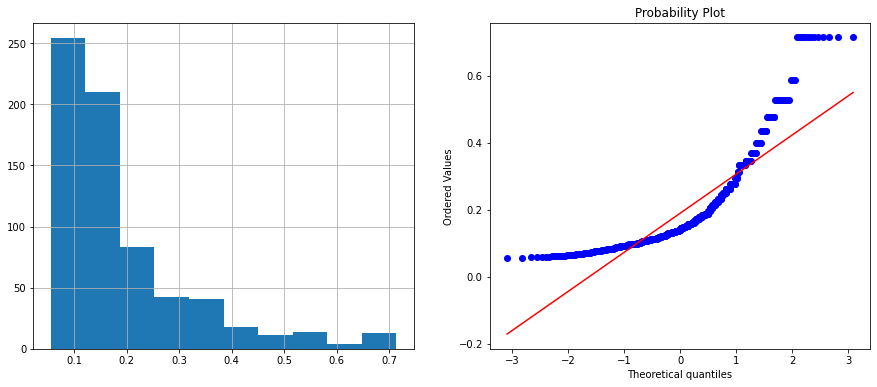

1.9532

In [82]:
df1['Rec_VM']=1/(df1['VM']+1)
diagnostic_plots(df1,'Rec_VM')
np.round(skew(df1["Rec_VM"]),4)


### Square Root Transformation For VM [Maximum sustained wind speed (Km/h)]

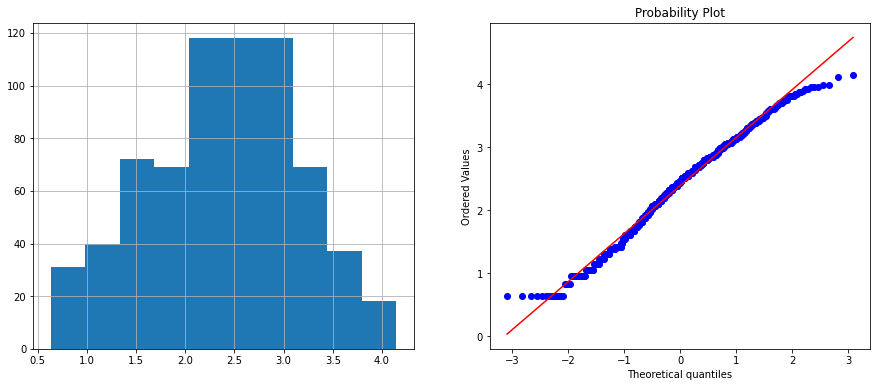

-0.2121

In [83]:
df1['sqr_VM']=df1['VM']**(1/2)
diagnostic_plots(df1,'sqr_VM')
np.round(skew(df1["sqr_VM"]),4)

### Exponential Transformation For VM [Maximum sustained wind speed (Km/h)]

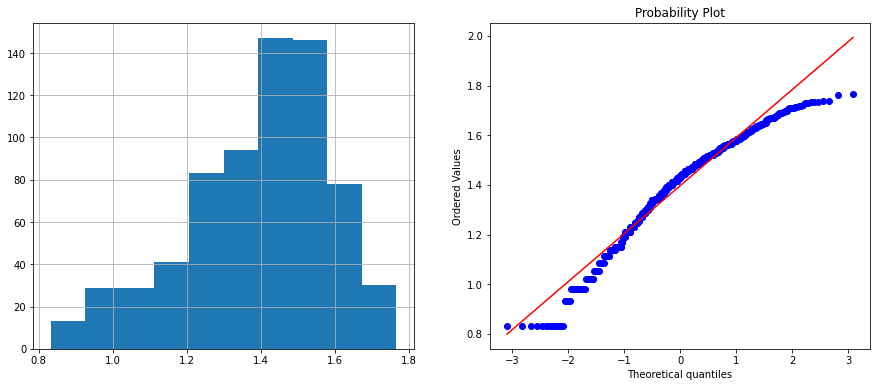

-0.7181

In [84]:
df1['Exp_VM']=df1['VM']**(1/5)
diagnostic_plots(df1,'Exp_VM')
np.round(skew(df1["Exp_VM"]),4)

### Boxcox Transformation For VM [Maximum sustained wind speed (Km/h)]

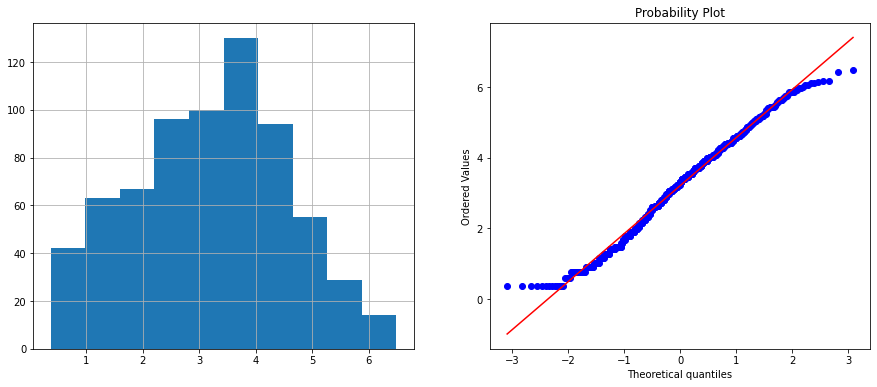

-0.0667

In [85]:
df1['VM_Boxcox'],parameters=stats.boxcox(df1['VM']+1) 
diagnostic_plots(df1,'VM_Boxcox')
np.round(skew(df1["VM_Boxcox"]),4)

In [86]:
log8=print(np.round(skew(df1["Log_VM"]),4))
rec8=print(np.round(skew(df1["Rec_VM"]),4))
sqr8=print(np.round(skew(df1["sqr_VM"]),4))
Exp8=print(np.round(skew(df1["Exp_VM"]),4))
Boxcox8=print(np.round(skew(df1["VM_Boxcox"]),4))

-0.6399
1.9532
-0.2121
-0.7181
-0.0667


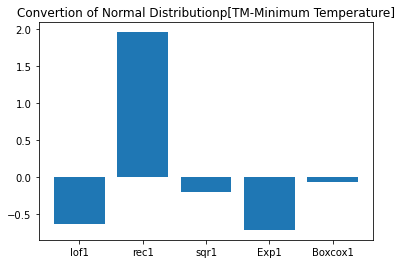

In [87]:
x = np.array(['lof1','rec1','sqr1','Exp1','Boxcox1'])
y = np.array([-0.6399,1.9532,-0.2121,-0.7181,-0.0667])
plt.title("Convertion of Normal Distributionp[TM-Minimum Temperature]")
plt.bar(x,y)
plt.show()

### Transformation for P.M 2.5

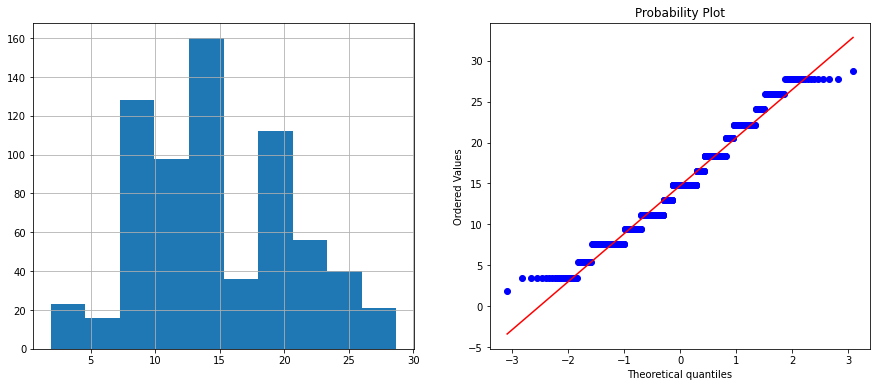

0.2908
--------------------------------------------------------------------------------------------------------------
----------------------------After Applying Logarithmic Transformation[Log_PM 2.5]-----------------------------
---------------------------------------------------------------------------------------------------------------


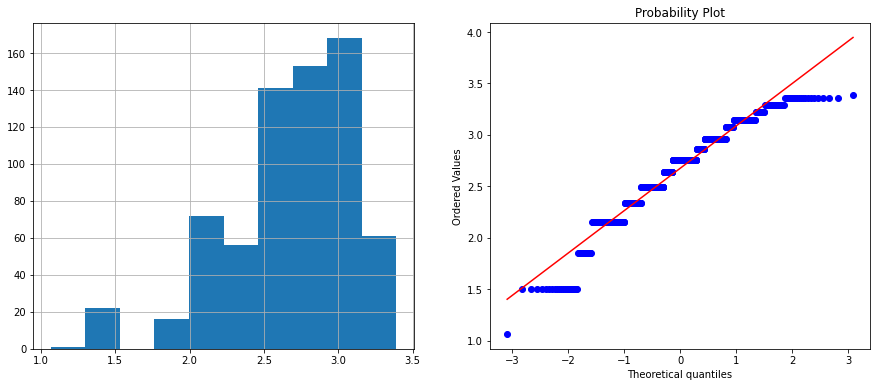

-0.7062


In [88]:
diagnostic_plots(df1,'PM 2.5')
print(np.round(skew(df1['PM 2.5']),4))
##Log Transformation
print("--------------------------------------------------------------------------------------------------------------")
print("----------------------------After Applying Logarithmic Transformation[Log_PM 2.5]-----------------------------")
print("---------------------------------------------------------------------------------------------------------------")
df1['Log_PM 2.5']=np.log(df1['PM 2.5']+1)
diagnostic_plots(df1,'Log_PM 2.5')
print(np.round(skew(df1['Log_PM 2.5']),4))

### Reciprocal Transformation For P.M 2.5

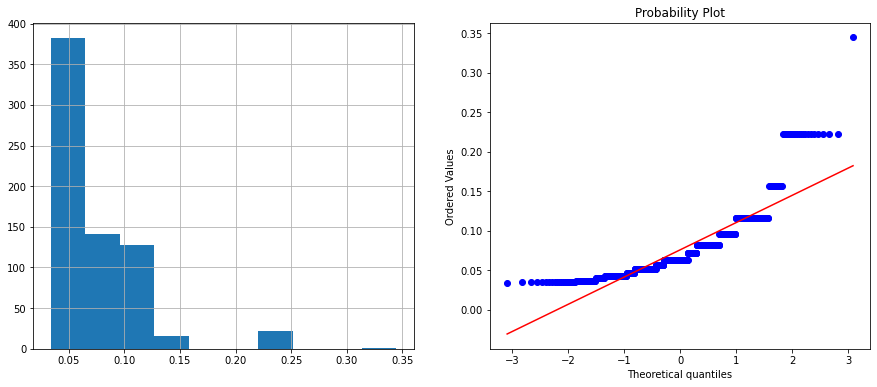

2.288

In [89]:
df1['Rec_PM 2.5']=1/(df1['PM 2.5']+1)
diagnostic_plots(df1,'Rec_PM 2.5')
np.round(skew(df1["Rec_PM 2.5"]),4)

### Square Root Transformation For PM 2.5

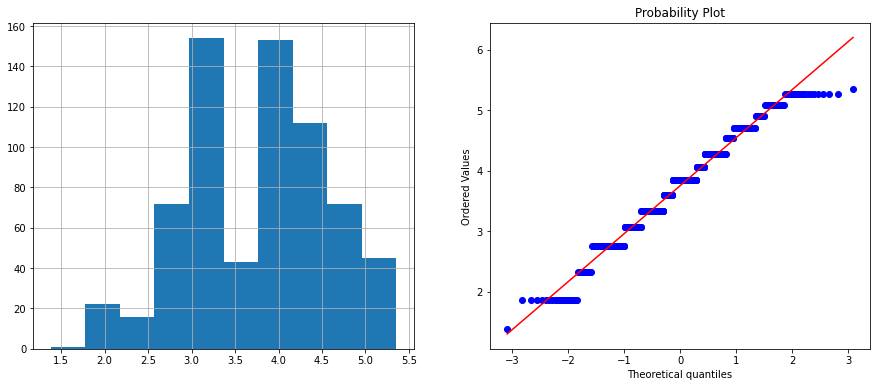

-0.2005

In [90]:
df1['sqr_PM 2.5']=df1['PM 2.5']**(1/2)
diagnostic_plots(df1,'sqr_PM 2.5')
np.round(skew(df1["sqr_PM 2.5"]),4)

### Exponential Transformation For PM 2.5

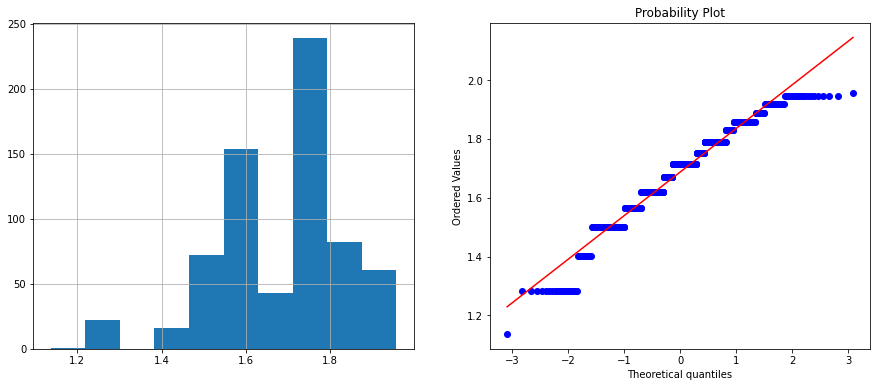

-0.5655

In [91]:
df1['Exp_PM 2.5']=df1['PM 2.5']**(1/5)
diagnostic_plots(df1,'Exp_PM 2.5')
np.round(skew(df1["Exp_PM 2.5"]),4)

### Boxcox Transformation For PM 2.5

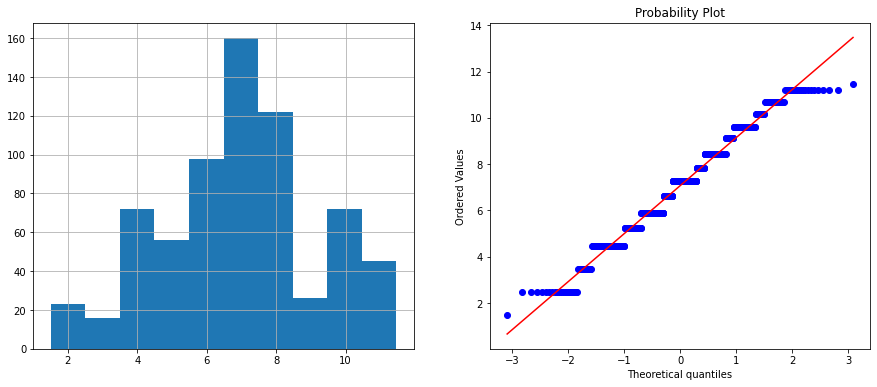

-0.0429

In [92]:
df1['PM 2.5_Boxcox'],parameters=stats.boxcox(df1['PM 2.5']+1) 
diagnostic_plots(df1,'PM 2.5_Boxcox')
np.round(skew(df1["PM 2.5_Boxcox"]),4)

In [93]:
log9=print(np.round(skew(df1["Log_PM 2.5"]),4))
rec9=print(np.round(skew(df1["Rec_PM 2.5"]),4))
sqr9=print(np.round(skew(df1["sqr_PM 2.5"]),4))
Exp9=print(np.round(skew(df1["Exp_PM 2.5"]),4))
Boxcox9=print(np.round(skew(df1["PM 2.5_Boxcox"]),4))

-0.7062
2.288
-0.2005
-0.5655
-0.0429


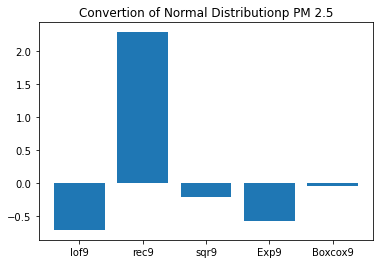

In [94]:
x = np.array(['lof9','rec9','sqr9','Exp9','Boxcox9'])
y = np.array([-0.7062,2.288,-0.2005,-0.5655,-0.0429])
plt.title("Convertion of Normal Distributionp PM 2.5")
plt.bar(x,y)
plt.show()

In [95]:
df1.columns

Index(['TM', 'Tm', 'AT', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5', 'Log_TM',
       'Rec_TM', 'sqr_TM', 'Exp_TM', 'TM_Boxcox', 'Log_Tm', 'Rec_Tm', 'sqr_Tm',
       'Exp_Tm', 'Tm_Boxcox', 'Log_AT', 'Rec_AT', 'sqr_AT', 'Exp_AT',
       'AT_Boxcox', 'Log_SLP', 'Rec_SLP', 'sqr_SLP', 'Exp_SLP', 'SLP_Boxcox',
       'Log_H', 'Rec_H', 'sqr_H', 'Exp_H', 'H_Boxcox', 'Log_VV', 'Rec_VV',
       'sqr_VV', 'Exp_VV', 'VV_Boxcox', 'Log_V', 'Rec_V', 'sqr_V', 'Exp_V',
       'V_Boxcox', 'Log_VM', 'Rec_VM', 'sqr_VM', 'Exp_VM', 'VM_Boxcox',
       'Log_PM 2.5', 'Rec_PM 2.5', 'sqr_PM 2.5', 'Exp_PM 2.5',
       'PM 2.5_Boxcox'],
      dtype='object')

In [96]:
data=pd.DataFrame(df1[['TM_Boxcox', 'Tm_Boxcox', 'AT_Boxcox', 'SLP_Boxcox', 'H_Boxcox', 'VV_Boxcox', 'V_Boxcox', 'VM_Boxcox', 'PM 2.5_Boxcox']])

In [97]:
data.head()

,TM_Boxcox,Tm_Boxcox,AT_Boxcox,SLP_Boxcox,H_Boxcox,VV_Boxcox,V_Boxcox,VM_Boxcox,PM 2.5_Boxcox
3,20.386897,110.218139,52.777892,3.804251,6.429665e+30,504.880720,0.860077,4.014141,9.137097
4,34.472022,189.653862,90.477970,5.210553,6.336871e+30,391.579712,1.446354,4.208273,9.620770
5,49.980231,267.308315,129.611701,12.961834,6.072052e+30,582.170243,0.635054,2.806335,5.909745
6,38.580135,191.315888,95.561026,11.806321,6.193501e+30,675.195572,0.524822,1.160192,4.482161
7,42.411085,218.843288,107.557503,8.153379,6.271335e+30,548.566998,0.860077,0.366201,2.474975


In [98]:
data.shape

(690, 9)

Pairplot of the Normalized data


<Figure size 576x288 with 0 Axes>

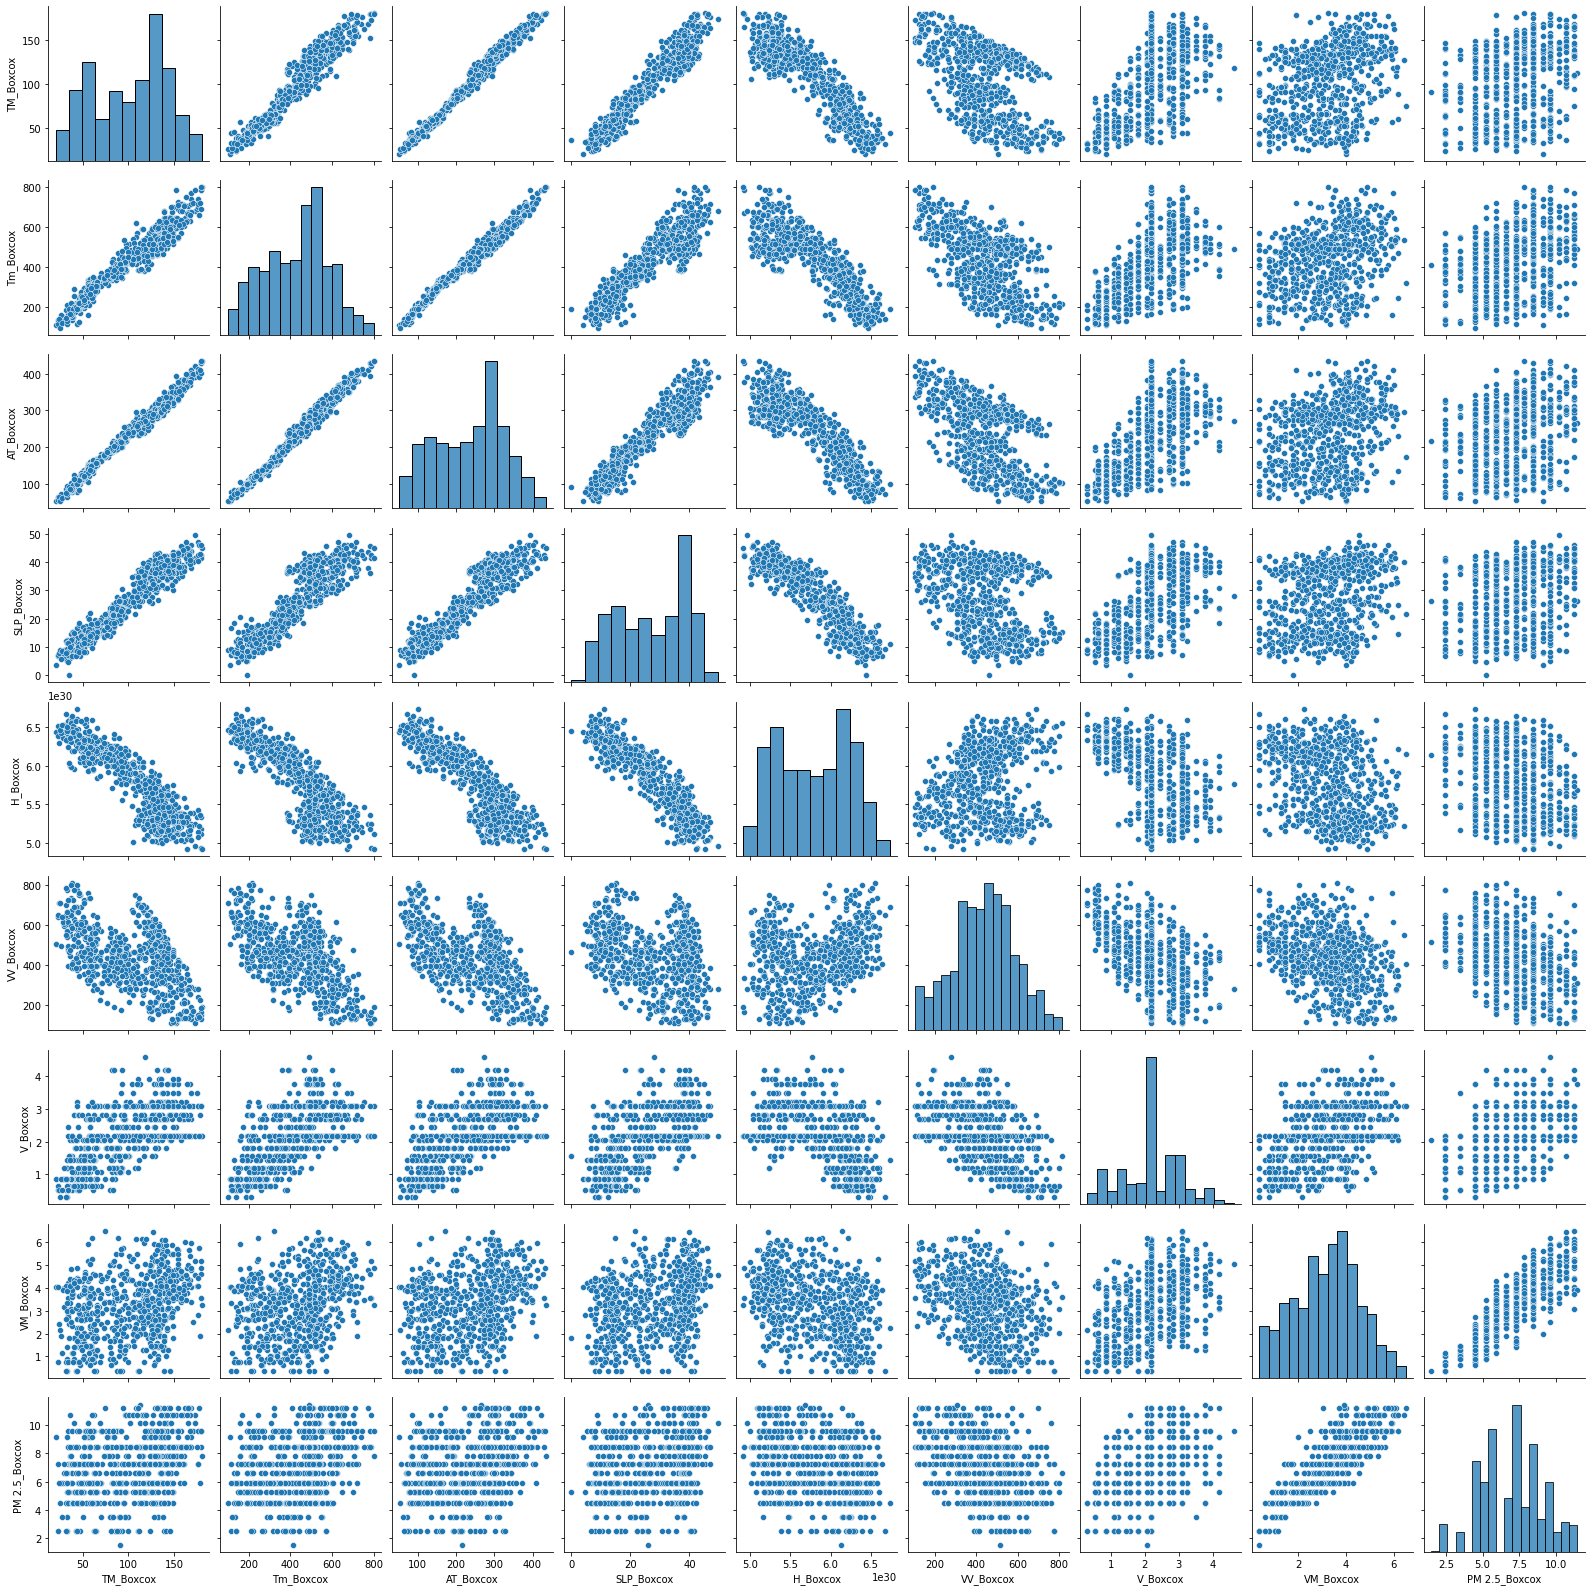

In [99]:
print('Pairplot of the Normalized data')
plt.figure(figsize=(8,4))
sns.pairplot(data)
#plt.title('Pairplot of AIR QUALITY INDEX DATA')
plt.show()

In [100]:
des_stat  = data.describe()
des_stat.loc['range'] = des_stat.loc['max'] - des_stat.loc['min']
des_stat.loc['variance'] = data.var()

fields = ['count','mean','min','max','range','25%','50%','75%','std','variance']
descriptive_statistics = des_stat.loc[fields]
descriptive_statistics.rename({'25%':'1st quartile','50%':'median','75%':'3rd quartile'},inplace = True)
print('The Descriptive Statistics of the AIR QUALITY INDEX data is:')
descriptive_statistics

The Descriptive Statistics of the AIR QUALITY INDEX data is:


,TM_Boxcox,Tm_Boxcox,AT_Boxcox,SLP_Boxcox,H_Boxcox,VV_Boxcox,V_Boxcox,VM_Boxcox,PM 2.5_Boxcox
count,690.000000,690.000000,690.000000,690.000000,6.900000e+02,690.000000,690.000000,690.000000,690.000000
mean,101.986565,432.436228,237.110198,27.299976,5.792065e+30,437.725421,2.182008,3.208783,7.068646
min,20.386897,97.753408,52.777892,0.000000,4.913025e+30,107.149159,0.309317,0.366201,1.503811
max,180.036068,800.655216,434.494949,49.566275,6.736324e+30,810.917306,4.606207,6.489853,11.466232
range,159.649171,702.901808,381.717058,49.566275,1.823299e+30,703.768147,4.296890,6.123652,9.962420
1st quartile,62.482517,310.326190,156.886248,15.906617,5.370507e+30,343.544388,1.567275,2.235745,5.909745
median,110.763379,462.600256,257.617292,28.811569,5.808160e+30,441.810505,2.188098,3.315399,7.253798
3rd quartile,133.836763,536.150800,303.839312,38.001608,6.193501e+30,537.524705,2.833293,4.144252,8.416896
std,40.244201,155.030048,90.195145,11.668644,4.522642e+29,147.678553,0.843176,1.362046,2.087847
variance,1619.595681,24034.315784,8135.164242,136.157245,2.045429e+59,21808.955075,0.710945,1.855168,4.359105


### Finding the Correlation between each columns

In [101]:
print('The correlation between each columns are: ')
data.corr(method='pearson')

The correlation between each columns are: 


,TM_Boxcox,Tm_Boxcox,AT_Boxcox,SLP_Boxcox,H_Boxcox,VV_Boxcox,V_Boxcox,VM_Boxcox,PM 2.5_Boxcox
TM_Boxcox,1.000000,0.963438,0.991609,0.958114,-0.895919,-0.499963,0.604844,0.320888,0.297570
Tm_Boxcox,0.963438,1.000000,0.989933,0.892037,-0.840820,-0.592323,0.573640,0.315336,0.305558
AT_Boxcox,0.991609,0.989933,1.000000,0.934602,-0.877509,-0.550087,0.594259,0.321903,0.304911
SLP_Boxcox,0.958114,0.892037,0.934602,1.000000,-0.916993,-0.289705,0.546696,0.306049,0.270834
H_Boxcox,-0.895919,-0.840820,-0.877509,-0.916993,1.000000,0.254832,-0.488958,-0.337866,-0.310897
VV_Boxcox,-0.499963,-0.592323,-0.550087,-0.289705,0.254832,1.000000,-0.492319,-0.370927,-0.404688
V_Boxcox,0.604844,0.573640,0.594259,0.546696,-0.488958,-0.492319,1.000000,0.439660,0.427691
VM_Boxcox,0.320888,0.315336,0.321903,0.306049,-0.337866,-0.370927,0.439660,1.000000,0.860070
PM 2.5_Boxcox,0.297570,0.305558,0.304911,0.270834,-0.310897,-0.404688,0.427691,0.860070,1.000000


Since the above result is not comfortable for understanding the results we use heatmap to visualize and get inferences from it

The Heat Map showing the correlation of each columns


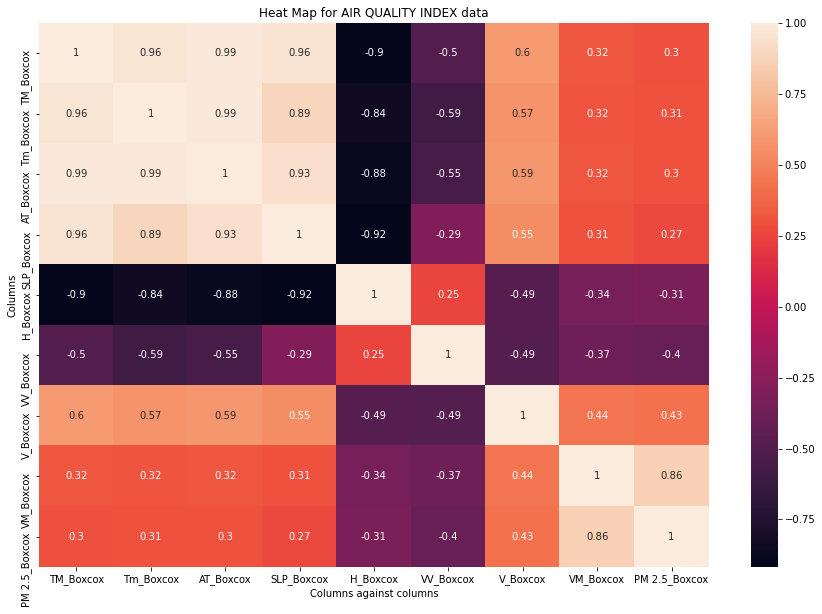

In [102]:
print('The Heat Map showing the correlation of each columns')
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(method='pearson'),annot=True)
plt.title("Heat Map for AIR QUALITY INDEX data")
plt.xlabel("Columns against columns")
plt.ylabel("Columns")
plt.show()

### Infrence
1. As the TM[Minimum Temperature]increases, then the Tm[Maximum Temperature] also increases and vice versa, as it has 0.96 
2. When we use to see the At(Average Temperature) in TM(Minimum Temperature) is highly correlated
3. As the TM(Minimum Temperature) increases, then the SLP(Atmospheric pressure at sea level [hPa]) also increases and vice versa, as it has 0.96 
4. As the TM(Maximum Temperature) increases, then the SLP(Atmospheric pressure at sea level [hPa]) also increases and vice versa, as it has 0.89
5. As the SLP(Atmospheric pressure at sea level [hPa]) increases, then the H(Average relative humidity %) decreases and vice versa, as it has -0.92
6. As the VM(Maximum sustained wind speed [Km/h]) increases, then the PM 2.5 (Fine Particulate Matter) also increases and vice versa, as it has 0.86

### Scatter plot Analysis

Scatter plot for the variables Minimum and Maximum temperature and the correlation between these two are:
           TM_Boxcox  Tm_Boxcox
TM_Boxcox   1.000000   0.963438
Tm_Boxcox   0.963438   1.000000


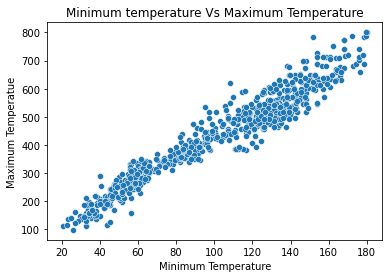

In [103]:
print('Scatter plot for the variables Minimum and Maximum temperature and the correlation between these two are:')
s1 = data[['TM_Boxcox','Tm_Boxcox']]
print(s1.corr(method='pearson'))
sns.scatterplot(x=data['TM_Boxcox'],y=data['Tm_Boxcox'])
plt.title("Minimum temperature Vs Maximum Temperature")
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperatue')
plt.show()

From the above scatter plot we may able to conform that when TM[Minimum Temperature] is increases Tm[Maximum Temperature] also increases

Scatter plot for the variables Minimum Temperature & Atmospheric pressure at sea level (SLP) and the correlation between these two are:
            TM_Boxcox  SLP_Boxcox
TM_Boxcox    1.000000    0.958114
SLP_Boxcox   0.958114    1.000000


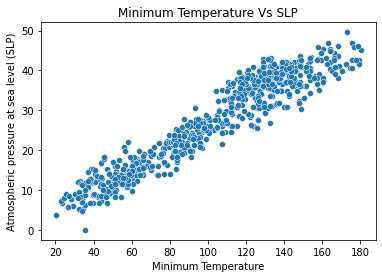

In [104]:
print('Scatter plot for the variables Minimum Temperature & Atmospheric pressure at sea level (SLP) and the correlation between these two are:')
s2 = data[['TM_Boxcox','SLP_Boxcox']]
print(s2.corr(method='pearson'))
sns.scatterplot(x=data["TM_Boxcox"],y=data["SLP_Boxcox"])
plt.title('Minimum Temperature Vs SLP')
plt.xlabel("Minimum Temperature")
plt.ylabel("Atmospheric pressure at sea level (SLP)")
plt.show()

From the above scatter plot we may able to conform that when TM[Minimum Temperature] is increases SLP[Atmospheric pressure at sea level] also increases

Scatter plot for the variables Minimum Temperature & Average relative humidity (%) and the correlation between these two are:
           TM_Boxcox  H_Boxcox
TM_Boxcox   1.000000 -0.895919
H_Boxcox   -0.895919  1.000000


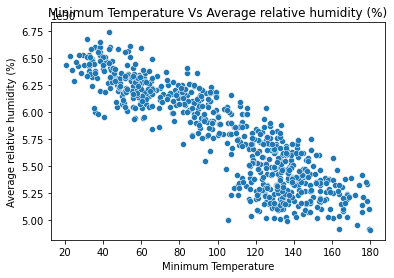

In [105]:
print('Scatter plot for the variables Minimum Temperature & Average relative humidity (%) and the correlation between these two are:')
s2 = data[['TM_Boxcox','H_Boxcox']]
print(s2.corr(method='pearson'))
sns.scatterplot(x=data["TM_Boxcox"],y=data["H_Boxcox"])
plt.title('Minimum Temperature Vs Average relative humidity (%)')
plt.xlabel("Minimum Temperature")
plt.ylabel("Average relative humidity (%)")
plt.show()

When Minimum Temperature is Increases the Average relative humidity decreases

Scatter plot for the variables Maximum Temperature & Atmospheric pressure at sea level (SLP) and the correlation between these two are:
            Tm_Boxcox  SLP_Boxcox
Tm_Boxcox    1.000000    0.892037
SLP_Boxcox   0.892037    1.000000


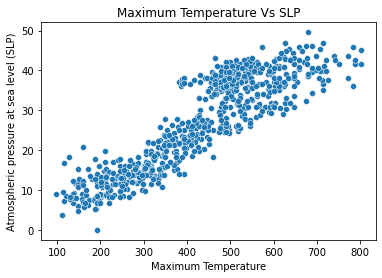

In [106]:
print('Scatter plot for the variables Maximum Temperature & Atmospheric pressure at sea level (SLP) and the correlation between these two are:')
s2 = data[['Tm_Boxcox','SLP_Boxcox']]
print(s2.corr(method='pearson'))
sns.scatterplot(x=data["Tm_Boxcox"],y=data["SLP_Boxcox"])
plt.title('Maximum Temperature Vs SLP')
plt.xlabel("Maximum Temperature")
plt.ylabel("Atmospheric pressure at sea level (SLP)")
plt.show()

When Maximum Temperature(Tm) increases Atmospheric pressure at sea level(SLP) also increases

Scatter plot for the variables Maximum Temperature & Average relative humidity (%) and the correlation between these two are:
           Tm_Boxcox  H_Boxcox
Tm_Boxcox    1.00000  -0.84082
H_Boxcox    -0.84082   1.00000


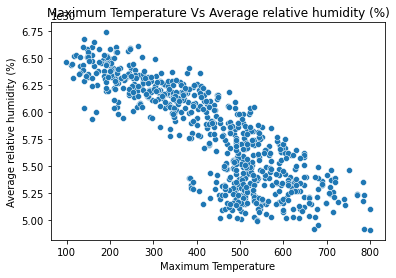

In [107]:
print('Scatter plot for the variables Maximum Temperature & Average relative humidity (%) and the correlation between these two are:')
s2 = data[['Tm_Boxcox','H_Boxcox']]
print(s2.corr(method='pearson'))
sns.scatterplot(x=data["Tm_Boxcox"],y=data["H_Boxcox"])
plt.title('Maximum Temperature Vs Average relative humidity (%)')
plt.xlabel("Maximum Temperature")
plt.ylabel("Average relative humidity (%)")
plt.show()

When Maximum Temperature is increases the Average Relative Humidity(%) decreases

## StandardScaler

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
Final_AQI=data

In [110]:
scaler1 = StandardScaler().fit(Final_AQI)

In [111]:
print(scaler1)

StandardScaler()


In [112]:
scaler1.mean_

array([1.01986565e+02, 4.32436228e+02, 2.37110198e+02, 2.72999762e+01,
       5.79206516e+30, 4.37725421e+02, 2.18200830e+00, 3.20878276e+00,
       7.06864571e+00])

In [113]:
scaler1.scale_

array([4.02150275e+01, 1.54917667e+02, 9.01297628e+01, 1.16601851e+01,
       4.51936390e+29, 1.47571501e+02, 8.42564454e-01, 1.36105819e+00,
       2.08633352e+00])

In [114]:
scaler1.transform(Final_AQI)

array([[-2.02908399, -2.0799312 , -2.04518797, ..., -1.56893737,
         0.59171492,  0.99142909],
       [-1.67883867, -1.5671703 , -1.6269013 , ..., -0.87311384,
         0.734348  ,  1.22325808],
       [-1.29320649, -1.06590757, -1.19270809, ..., -1.83600688,
        -0.29568741, -0.55547244],
       ...,
       [-1.52414436, -1.15305692, -1.35428964, ..., -1.83600688,
         0.734348  ,  0.08874537],
       [-1.25889912, -1.33255851, -1.30326306, ..., -1.15595289,
         0.41918188,  0.36488413],
       [-1.25889912, -1.28565978, -1.28030699, ..., -0.87311384,
         0.51862123,  0.64622941]])

In [115]:
Final_data=scaler1.transform(Final_AQI)

In [116]:
type(Final_data)

numpy.ndarray

In [117]:
AQI = pd.DataFrame(Final_data,columns=data.columns)

## Feature Importance

In [118]:
AQI.columns

Index(['TM_Boxcox', 'Tm_Boxcox', 'AT_Boxcox', 'SLP_Boxcox', 'H_Boxcox',
       'VV_Boxcox', 'V_Boxcox', 'VM_Boxcox', 'PM 2.5_Boxcox'],
      dtype='object')

In [119]:
X = AQI.iloc[:,:-1] #independent variables
y = AQI['PM 2.5_Boxcox'] #dependent variable

In [120]:
X.head()

,TM_Boxcox,Tm_Boxcox,AT_Boxcox,SLP_Boxcox,H_Boxcox,VV_Boxcox,V_Boxcox,VM_Boxcox
0,-2.029084,-2.079931,-2.045188,-2.015039,1.410817,0.455070,-1.568937,0.591715
1,-1.678839,-1.567170,-1.626901,-1.894432,1.205493,-0.312701,-0.873114,0.734348
2,-1.293206,-1.065908,-1.192708,-1.229667,0.619527,0.978812,-1.836007,-0.295687
3,-1.576685,-1.556442,-1.570504,-1.328766,0.888257,1.609187,-1.966836,-1.505146
4,-1.481423,-1.378751,-1.437402,-1.642049,1.060480,0.751104,-1.568937,-2.088509


In [121]:
from sklearn.ensemble import ExtraTreesRegressor

In [122]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [123]:
print(model.feature_importances_)

[0.02960847 0.02811192 0.02843676 0.03027552 0.03350275 0.05610156
 0.04908183 0.74488119]


Bar Plot for feature importances


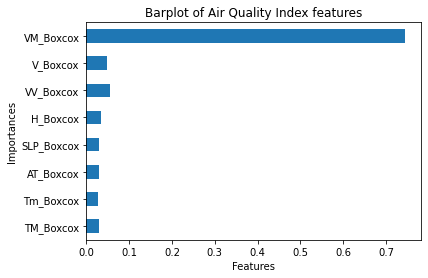

In [124]:
feature_importances=pd.Series(model.feature_importances_,index=X.columns)
print("Bar Plot for feature importances")
feature_importances.plot(kind='barh')
plt.title('Barplot of Air Quality Index features')
plt.xlabel('Features')
plt.ylabel('Importances')
plt.show()

### Test Train Split

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# MODEL

### Linear Regression

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [128]:
print("The Coefficients of the Linear Regression model that we created are {}".format(lin_reg.coef_))

The Coefficients of the Linear Regression model that we created are [-2.00376704 -1.52576294  3.05896384  0.20302045 -0.17275415 -0.21110459
  0.07774262  0.75693474]


In [129]:
print("The Intercept of the Linear Regression model that we created is {}".format(lin_reg.intercept_))

The Intercept of the Linear Regression model that we created is -0.02607894351671737


From the above results,

1. We have loaded the training data into the model
2. We got the Coefficients of the Linear Regression model.
3. We have also got the Intercept of the Linear model.

#### Evaluation on training data

In [130]:
print("Coefficient of determination R^2 on training dataset is: {}".format(lin_reg.score(X_train,y_train)))

Coefficient of determination R^2 on training dataset is: 0.7588394011255758


#### Evaluation on test data

In [131]:
print("Coefficient of determination R^2 on test dataset is: {}".format(lin_reg.score(X_test,y_test)))

Coefficient of determination R^2 on test dataset is: 0.7438361403956663


#### Cross validation Score

In [132]:
from sklearn.model_selection import cross_val_score

In [133]:
cross_score = cross_val_score(lin_reg,X,y,cv=5)
print("The Mean value for Cross validation score of Air Quality Index Data is {}".format(cross_score.mean()))

The Mean value for Cross validation score of Air Quality Index Data is 0.7276086394397664


From the above results, we find that the model is Good with the data that we have loaded also we prove that by using the Cross-validation. Now, we do some visualization and also look to find the values of the error.

#### Model Evaluation

In [134]:
lin_coeff_df = pd.DataFrame(lin_reg.coef_,X.columns,columns=['Coefficient'])
lin_coeff_df

,Coefficient
TM_Boxcox,-2.003767
Tm_Boxcox,-1.525763
AT_Boxcox,3.058964
SLP_Boxcox,0.203020
H_Boxcox,-0.172754
VV_Boxcox,-0.211105
V_Boxcox,0.077743
VM_Boxcox,0.756935


#### Errors

In [135]:
lin_pred = lin_reg.predict(X_test)

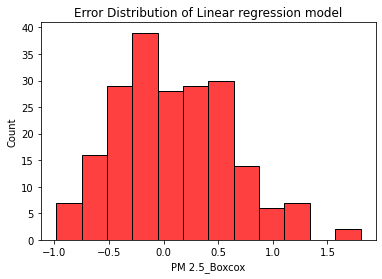

In [136]:
sns.histplot(y_test - lin_pred,color='red')
plt.title("Error Distribution of Linear regression model")
plt.show()

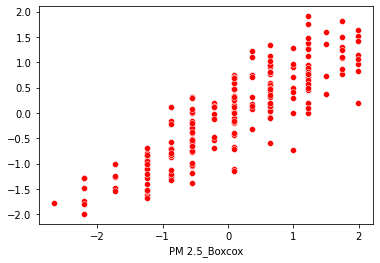

In [137]:
sns.scatterplot(x=y_test,y=lin_pred,color='red')
#plt.title("Actual Vs Prediction(Linear Regression)")
#plt.xlabel('Actual')
#plt.ylabel('Prediction')
plt.show()

#### Loss Functions

In [138]:
from sklearn import metrics

In [139]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,lin_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,lin_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,lin_pred)))

Mean Absolute Error: 0.4229799273595115
Mean Squared Error: 0.27857579673720423
Root Mean Squared Error: 0.5278028009940874


### Ridge Regression

In [140]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [141]:
ridge = Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_reg = GridSearchCV(ridge,parameters,scoring = 'neg_mean_squared_error',cv=5)
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [142]:
print("The Best Parameters for this model {}",format(ridge_reg.best_params_))

The Best Parameters for this model {} {'alpha': 5}


In [143]:
print("The Best Score for this model {}".format(ridge_reg.best_score_))

The Best Score for this model -0.24153724072910526


#### Model Evaluation for Training data of Ridge Regression

In [144]:
print("The Coefficient of R^2 on training dataset {}".format(ridge_reg.score(X_train,y_train)))

The Coefficient of R^2 on training dataset -0.23188904648786665


#### Model Evaluation for test data of Ridge Regression

In [145]:
print("The Coefficient of R^2 on test data {}".format(ridge_reg.score(X_test,y_test)))

The Coefficient of R^2 on test data -0.2826248209419142


### Cross Validation

In [146]:
cross_val_ridge = cross_val_score(ridge_reg,X,y,cv=5)
print("The Mean value of Cross Validation Score for the Air Quality Index dataset is {}".format(cross_val_ridge.mean()))

The Mean value of Cross Validation Score for the Air Quality Index dataset is -0.25517321294255024


### ERRORS

In [147]:
ridge_pred = ridge_reg.predict(X_test)

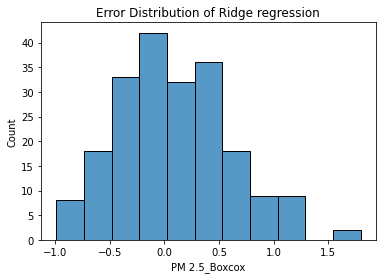

In [148]:
sns.histplot(y_test - ridge_pred)
plt.title('Error Distribution of Ridge regression')
plt.show()

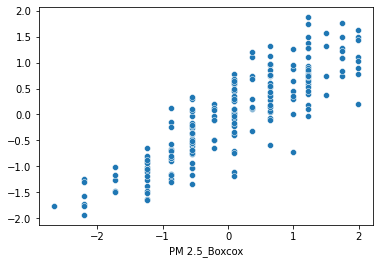

In [149]:
sns.scatterplot(x=y_test,y=ridge_pred)
plt.show()

#### Loss Functions

In [150]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,ridge_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,ridge_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,ridge_pred)))

Mean Absolute Error: 0.4247114508276741
Mean Squared Error: 0.2826248209419142
Root Mean Squared Error: 0.5316246993339514


### Lasso Regression

In [151]:
from sklearn.linear_model import Lasso

In [152]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_reg=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X_train,y_train)

C:\Users\MONOJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45.08270451145682, tolerance: 0.03727414010139303
  model = cd_fast.enet_coordinate_descent(
C:\Users\MONOJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.73565490846565, tolerance: 0.035388793684490875
  model = cd_fast.enet_coordinate_descent(
C:\Users\MONOJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45.88128063417515, tolerance: 0.035376027714716186
  model = cd_fast.enet_coordinate_descent(
C:\Users\MONOJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergen

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [153]:
print("The Best Parameters of this model is:",lasso_reg.best_params_)
print("The Best Score of this model is:",lasso_reg.best_score_)

The Best Parameters of this model is: {'alpha': 0.001}
The Best Score of this model is: -0.24188528885887384


#### Model Evaluation for Training data in Lasso Regression

In [154]:
print("The Coefficient of R^2 on training dataset {}".format(lasso_reg.score(X_train,y_train)))

The Coefficient of R^2 on training dataset -0.2316641403651487


#### Model Evaluation for Test data in Lasso Regression

In [155]:
print("The Coefficient of R^2 on test dataset {}".format(lasso_reg.score(X_test,y_test)))

The Coefficient of R^2 on test dataset -0.2803562598033142


### Cross validation

In [156]:
cross_val_lasso = cross_val_score(lasso_reg,X,y,cv=5)
print("The Mean value of Cross Validation Score for the Air Quality Index dataset is {}".format(cross_val_lasso.mean()))

C:\Users\MONOJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56.07640370939461, tolerance: 0.04580111637624534
  model = cd_fast.enet_coordinate_descent(
C:\Users\MONOJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.60782223821032, tolerance: 0.047525508468401895
  model = cd_fast.enet_coordinate_descent(
C:\Users\MONOJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54.36150502807026, tolerance: 0.04531340658140861
  model = cd_fast.enet_coordinate_descent(
C:\Users\MONOJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergenc

C:\Users\MONOJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53.09817366863598, tolerance: 0.048634257701415606
  model = cd_fast.enet_coordinate_descent(
C:\Users\MONOJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 56.53921729761028, tolerance: 0.04445602537780242
  model = cd_fast.enet_coordinate_descent(
C:\Users\MONOJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.262556793022334, tolerance: 0.04552155261173466
  model = cd_fast.enet_coordinate_descent(
C:\Users\MONOJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergen

C:\Users\MONOJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.789083025380904, tolerance: 0.0442530462541323
  model = cd_fast.enet_coordinate_descent(
C:\Users\MONOJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.41975990152906, tolerance: 0.04178447249452601
  model = cd_fast.enet_coordinate_descent(
C:\Users\MONOJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.33562702568997, tolerance: 0.045021375384577025
  model = cd_fast.enet_coordinate_descent(
C:\Users\MONOJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergenc

The Mean value of Cross Validation Score for the Air Quality Index dataset is -0.25777777098506854


C:\Users\MONOJ\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.865538616681064, tolerance: 0.053999593572632364
  model = cd_fast.enet_coordinate_descent(


### ERRORS

In [157]:
lasso_pred = lasso_reg.predict(X_test)

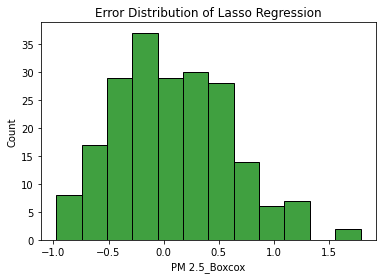

In [158]:
sns.histplot(y_test-lasso_pred,color='green')
plt.title("Error Distribution of Lasso Regression")
plt.show()

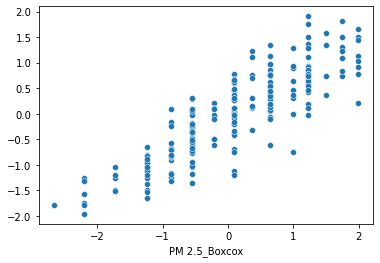

In [159]:
sns.scatterplot(x=y_test,y=lasso_pred)
plt.show()

### Loss Functions

In [160]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,lasso_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,lasso_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)))

Mean Absolute Error: 0.4225978732592687
Mean Squared Error: 0.2803562598033142
Root Mean Squared Error: 0.5294867890734519


### Decision Tree Regressor

In [161]:
from sklearn.tree import DecisionTreeRegressor

In [162]:
dtree = DecisionTreeRegressor(criterion='mse')
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

#### Model Evaluation of training dataset for Decision Tree

In [163]:
print("The Coefficient of determination R^2  on training dataset: {}".format(dtree.score(X_train, y_train)))

The Coefficient of determination R^2  on training dataset: 1.0


#### Model Evaluation of testing dataset for Decision Tree

In [164]:
print("The Coefficient of determination R^2 on test dataset: {}".format(dtree.score(X_test, y_test)))

The Coefficient of determination R^2 on test dataset: 0.5129198634132093


### Cross Validation Score

In [165]:
cross_dtree = cross_val_score(dtree,X,y,cv=5)
print("The Mean value of Cross Validation Score for the Air Quality Index dataset is {}".format(cross_dtree.mean()))

The Mean value of Cross Validation Score for the Air Quality Index dataset is 0.4404726584636184


### Errors

In [166]:
dtree_pred = dtree.predict(X_test)

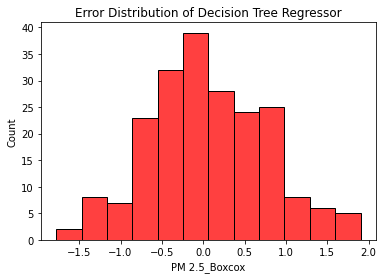

In [167]:
sns.histplot(y_test-dtree_pred,color='red')
plt.title("Error Distribution of Decision Tree Regressor")
plt.show()

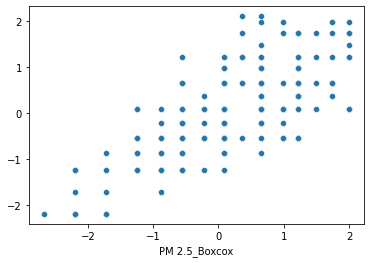

In [168]:
sns.scatterplot(x=y_test,y=dtree_pred)
plt.show()

#### Loss Functions

In [169]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,dtree_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,dtree_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,dtree_pred)))

Mean Absolute Error: 0.571366149576213
Mean Squared Error: 0.52969508397521
Root Mean Squared Error: 0.7278015416136531


### RandomForestRegressor

In [170]:
from sklearn.ensemble import RandomForestRegressor

In [171]:
rand_reg = RandomForestRegressor()
rand_reg.fit(X_train,y_train)

RandomForestRegressor()

#### Model Evaluation for training dataset using RandomForestRegressor

In [172]:
print("The Coefficient of determination R^2 on training dataset {}".format(rand_reg.score(X_train,y_train)))

The Coefficient of determination R^2 on training dataset 0.9615972187679087


#### Model Evaluation for test dataset using RandomForestRegressor

In [173]:
print("The Coefficient of determination R^2 on test data {}".format(rand_reg.score(X_test,y_test)))

The Coefficient of determination R^2 on test data 0.7243815201878521


### Cross validation

In [174]:
rand_cross = cross_val_score(rand_reg,X,y,cv=5)
print("The Mean value of Cross validation Score for AQI data is {}".format(rand_cross.mean()))

The Mean value of Cross validation Score for AQI data is 0.7030699419080361


### ERRORS

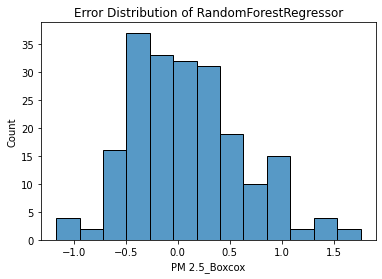

In [175]:
rand_pred = rand_reg.predict(X_test)
sns.histplot(y_test - rand_pred)
plt.title("Error Distribution of RandomForestRegressor")
plt.show()

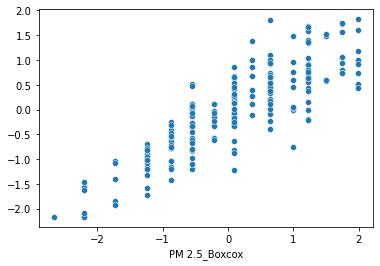

In [176]:
sns.scatterplot(x=y_test,y=rand_pred)
plt.show()

#### Loss Functions

In [177]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,rand_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,rand_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,rand_pred)))

Mean Absolute Error: 0.42868842969601917
Mean Squared Error: 0.2997325138985656
Root Mean Squared Error: 0.5474783227659024


### KNearest Neighbor Regressor

In [178]:
from sklearn.neighbors import KNeighborsRegressor

In [179]:
kn_reg = KNeighborsRegressor(n_neighbors = 3)
kn_reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

#### Model Evaluation for training dataset

In [180]:
print("The Coefficient of determination R^2 for training dataset is {}".format(kn_reg.score(X_train,y_train)))

The Coefficient of determination R^2 for training dataset is 0.8168124551222775


#### Model Evaluation for testing dataset

In [181]:
print("The Coefficient of determination R^2 for testing dataset is {}".format(kn_reg.score(X_test,y_test)))

The Coefficient of determination R^2 for testing dataset is 0.6442714210774807


### Cross Validation

In [182]:
kn_cross = cross_val_score(kn_reg,X,y,cv=5)
print("The Mean value of cross validation score for AQI dataset is {}".format(kn_cross.mean()))

The Mean value of cross validation score for AQI dataset is 0.5973222569116426


### ERRORS

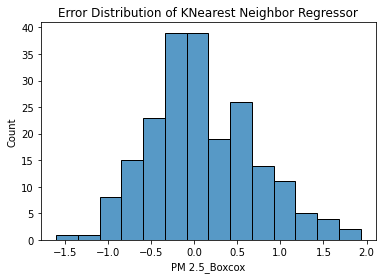

In [183]:
kn_pred = kn_reg.predict(X_test)
sns.histplot(y_test-kn_pred)
plt.title("Error Distribution of KNearest Neighbor Regressor")
plt.show()

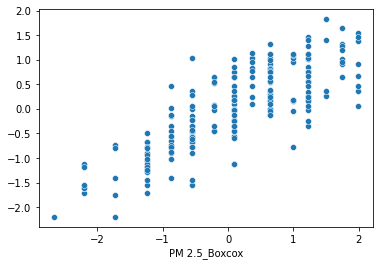

In [184]:
sns.scatterplot(x=y_test,y=kn_pred)
plt.show()

### Loss Functions

In [185]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,kn_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,kn_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,kn_pred)))

Mean Absolute Error: 0.4814187512956192
Mean Squared Error: 0.38685149594715795
Root Mean Squared Error: 0.6219738707913364


### XgboostRegressor

In [186]:
import xgboost as xgb

In [187]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

#### Model Evaluation for training dataset

In [188]:
print("The Coefficient of determination R^2 on training set is {}".format(xg_reg.score(X_train, y_train)))

The Coefficient of determination R^2 on training set is 0.9998974591629128


#### Model Evaluation for test dataset

In [189]:
print("The Coefficient of determination R^2 on test set is {}".format(xg_reg.score(X_test, y_test)))

The Coefficient of determination R^2 on test set is 0.6972697176208569


### Cross validation

In [190]:
xg_cross = cross_val_score(xg_reg,X,y,cv=5)
print("The Mean Value for Cross Validation using XgboostRegressor is {}".format(xg_cross.mean()))

The Mean Value for Cross Validation using XgboostRegressor is 0.6788683944775511


#### ERRORS

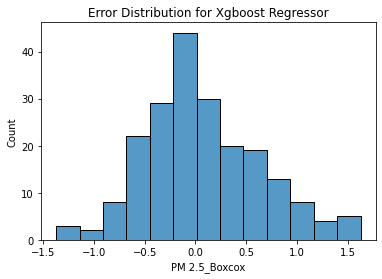

In [191]:
xg_pred = xg_reg.predict(X_test)
sns.histplot(y_test-xg_pred)
plt.title("Error Distribution for Xgboost Regressor")
plt.show()

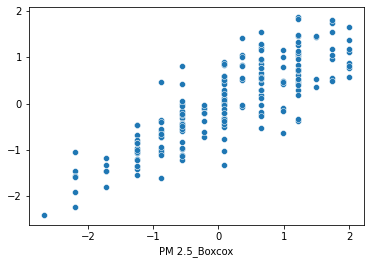

In [192]:
sns.scatterplot(x=y_test,y=xg_pred)
plt.show()

#### Loss Functions

In [193]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,xg_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,xg_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,xg_pred)))

Mean Absolute Error: 0.4451932280357641
Mean Squared Error: 0.32921634511795844
Root Mean Squared Error: 0.5737737752093227


In [194]:
import pickle

In [202]:
modelname = 'trained_model.sav'
pickle.dump(lin_reg,open(modelname,'wb'))